<a href="https://colab.research.google.com/github/dpnolan/taba/blob/main/TABA_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part A
# Time series analysis for Irish airports departures data

# Install R and libraries 

In [50]:
# Start a new R notebook in Jupyter using URL https://colab.research.google.com/notebook#create=true&language=r 

In [51]:
install.packages('tseries')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("tseries"):
“installation of package ‘tseries’ had non-zero exit status”


In [52]:
library('tseries')

In [53]:
install.packages('fpp2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [54]:
library('fpp2')

In [55]:
library('ggplot2')
library('zoo')

In [56]:
install.packages('moments')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [57]:
library('moments')

In [58]:
library('scales')

In [129]:
install.packages('patchwork')
library(patchwork)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Import the departures data

In [59]:
departs<-c(
732.40,
757.20,
919.60,
709.50,
977.90,
1183.10,
1269.50,
1250.50,
1078.70,
1045.80,
800.70,
700.50,
729.60,
724.00,
869.60,
987.90,
1084.20,
1198.50,
1288.00,
1247.80,
1070.30,
978.70,
774.30,
754.30,
700.50,
706.90,
874.80,
972.60,
1089.60,
1222.30,
1278.80,
1244.20,
1122.10,
1041.30,
804.10,
782.40,
709.50,
698.70,
937.30,
972.30,
1160.20,
1292.10,
1336.70,
1314.30,
1144.20,
1079.90,
836.50,
832.70,
764.70,
742.80,
892.50,
1112.70,
1223.80,
1361.80,
1418.40,
1403.90,
1231.20,
1179.90,
925.40,
912.30,
861.50,
850.30,
1063.40,
1178.50,
1359.90,
1541.70,
1600.00,
1552.50,
1368.80,
1339.80,
1055.40,
1018.60,
981.70,
989.00,
1236.50,
1282.80,
1475.70,
1684.60,
1738.70,
1688.90,
1498.60,
1462.30,
1134.90,
1145.30,
1057.10,
1020.20,
1227.70,
1438.70,
1530.60,
1761.50,
1828.60,
1778.10,
1583.60,
1505.90,
1203.50,
1204.30,
1115.60,
1047.30,
1294.60,
1473.80,
1687.40,
1879.00,
1932.00,
1865.20,
1691.00,
1624.90,
1284.00,
1285.70,
1169.30,
1139.10,
1375.40,
1622.60,
1744.00,
1933.40,
2006.90,
1967.50,
1757.40,
1660.10,
1279.10,
1320.20,
1183.50,
1161.90,
575.60,
12.80,
24.70,
53.10,
239.00,
275.50,
203.50,
143.70,
85.10,
156.10,
104.10,
46.70,
57.50,
61.50,
82.40,
174.70,
384.00,
673.00,
716.60,
821.20,
749.70,
687.90,
528.40,
751.90,
1014.70,
1395.10,
1499.10,
1704.00,
1788.20,
1749.60,
1592.20
)

# Load and clean the data

We will use only the time series object from the Rstat tseries  
This combines an observation in double float point format   
with its datetime, the month+year in our case  

In [60]:
ts_departs<-ts(departs,start=c(2010,1),frequency=12)
ts_departs

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,732.4,757.2,919.6,709.5,977.9,1183.1,1269.5,1250.5,1078.7,1045.8,800.7,700.5
2011,729.6,724.0,869.6,987.9,1084.2,1198.5,1288.0,1247.8,1070.3,978.7,774.3,754.3
2012,700.5,706.9,874.8,972.6,1089.6,1222.3,1278.8,1244.2,1122.1,1041.3,804.1,782.4
2013,709.5,698.7,937.3,972.3,1160.2,1292.1,1336.7,1314.3,1144.2,1079.9,836.5,832.7
2014,764.7,742.8,892.5,1112.7,1223.8,1361.8,1418.4,1403.9,1231.2,1179.9,925.4,912.3
2015,861.5,850.3,1063.4,1178.5,1359.9,1541.7,1600.0,1552.5,1368.8,1339.8,1055.4,1018.6
2016,981.7,989.0,1236.5,1282.8,1475.7,1684.6,1738.7,1688.9,1498.6,1462.3,1134.9,1145.3
2017,1057.1,1020.2,1227.7,1438.7,1530.6,1761.5,1828.6,1778.1,1583.6,1505.9,1203.5,1204.3
2018,1115.6,1047.3,1294.6,1473.8,1687.4,1879.0,1932.0,1865.2,1691.0,1624.9,1284.0,1285.7
2019,1169.3,1139.1,1375.4,1622.6,1744.0,1933.4,2006.9,1967.5,1757.4,1660.1,1279.1,1320.2


In [61]:
# Check the basic definition terms are correct
start(ts_departs)
end(ts_departs)
frequency(ts_departs)

[1] 2010    1

[1] 2022    9

[1] 12

In [62]:
length(ts_departs)
# 153 observations
ts_departs<-(na.omit(ts_departs))
# Remove any NA values
length(ts_departs)
# Still 153 observations

[1] 153

[1] 153

In [63]:
library(repr)
options(repr.plot.width=15, repr.plot.height=12)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


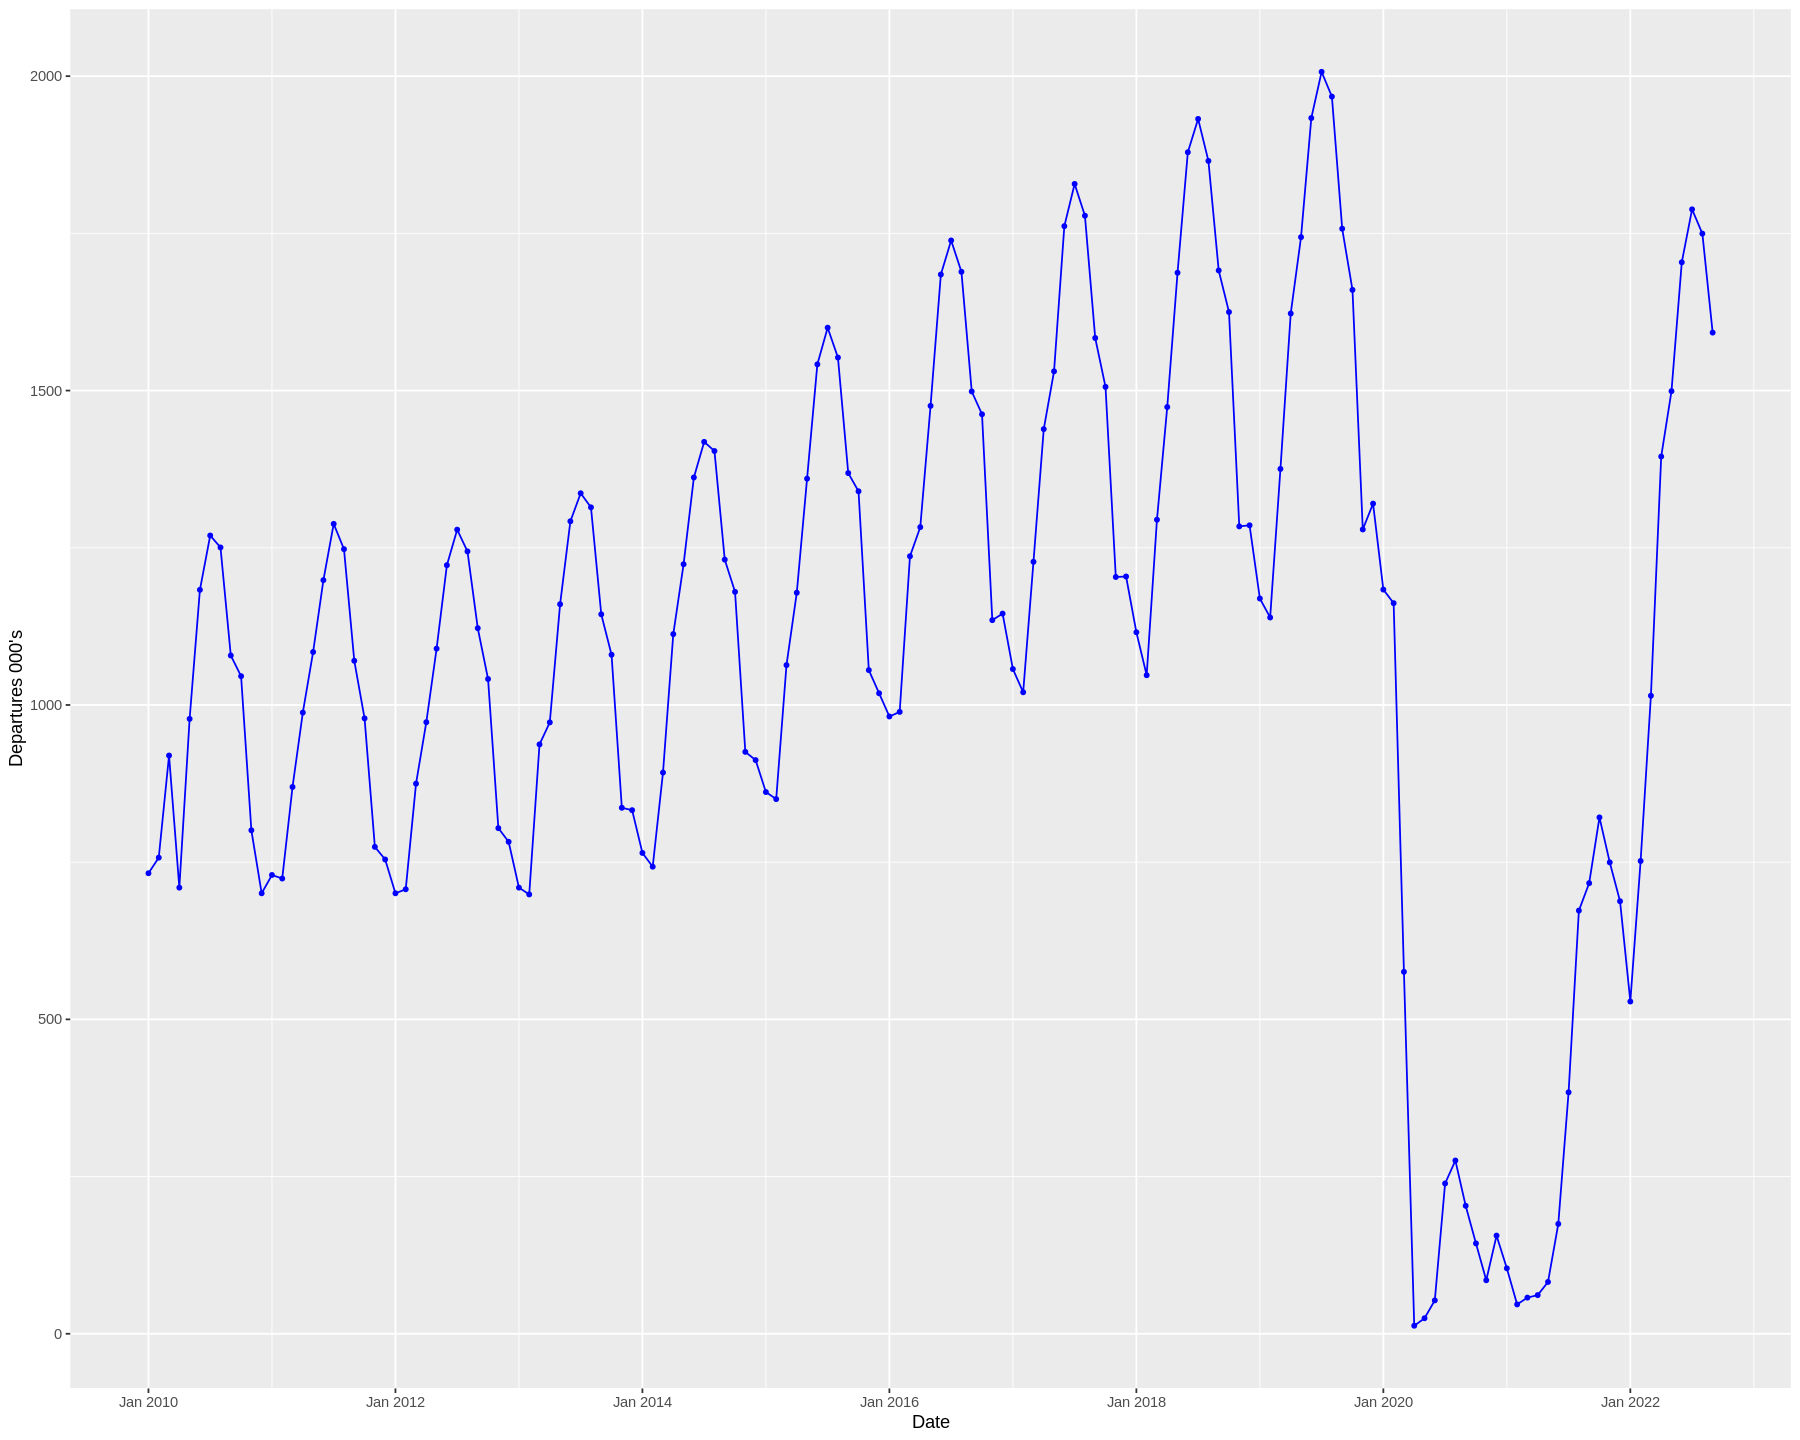

In [64]:
# Graph the full time series 
ggplot(ts_departs, aes(x=as.yearmon(index(ts_departs)),y = ts_departs))+
  geom_line(colour='blue')+
  geom_point(size=1,colour='blue') + 
  ylab("Departures 000's") + xlab('Date')

# Data summary - 
The top chart shows a pronounced, strong growth trend
1. Consistent upward trend in maximum and min for each series from 2013 to 2020
2. Clear seasonality with peaks in the summer months
3. Pandemic effect is clear in the rapid fall in Q1 of 2020 and slow recovery
4. Recovery in 2021 and 2022 brings the annual peak close to the 2019 numbers

In [23]:
# Descriptive statistics
# mean, median, quantiles, max and min values
summary(ts_departs)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   12.8   800.7  1134.9  1088.6  1375.4  2006.9 

In [24]:
# Max value is ?
max(ts_departs)
# When was the max? 
which.max(ts_departs)
index(ts_departs)[115]
# July 2019


[1] 2006.9

[1] 115

[1] 2019.5

In [25]:
# Min value is ?
min(ts_departs)
# When? 
which.min(ts_departs)
index(ts_departs)[124]
# April 2020

[1] 12.8

[1] 124

[1] 2020.25

In [ ]:
#Mean, skew and kurtosis
mean(ts_departs)
skewness(ts_departs)
kurtosis(ts_departs)

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


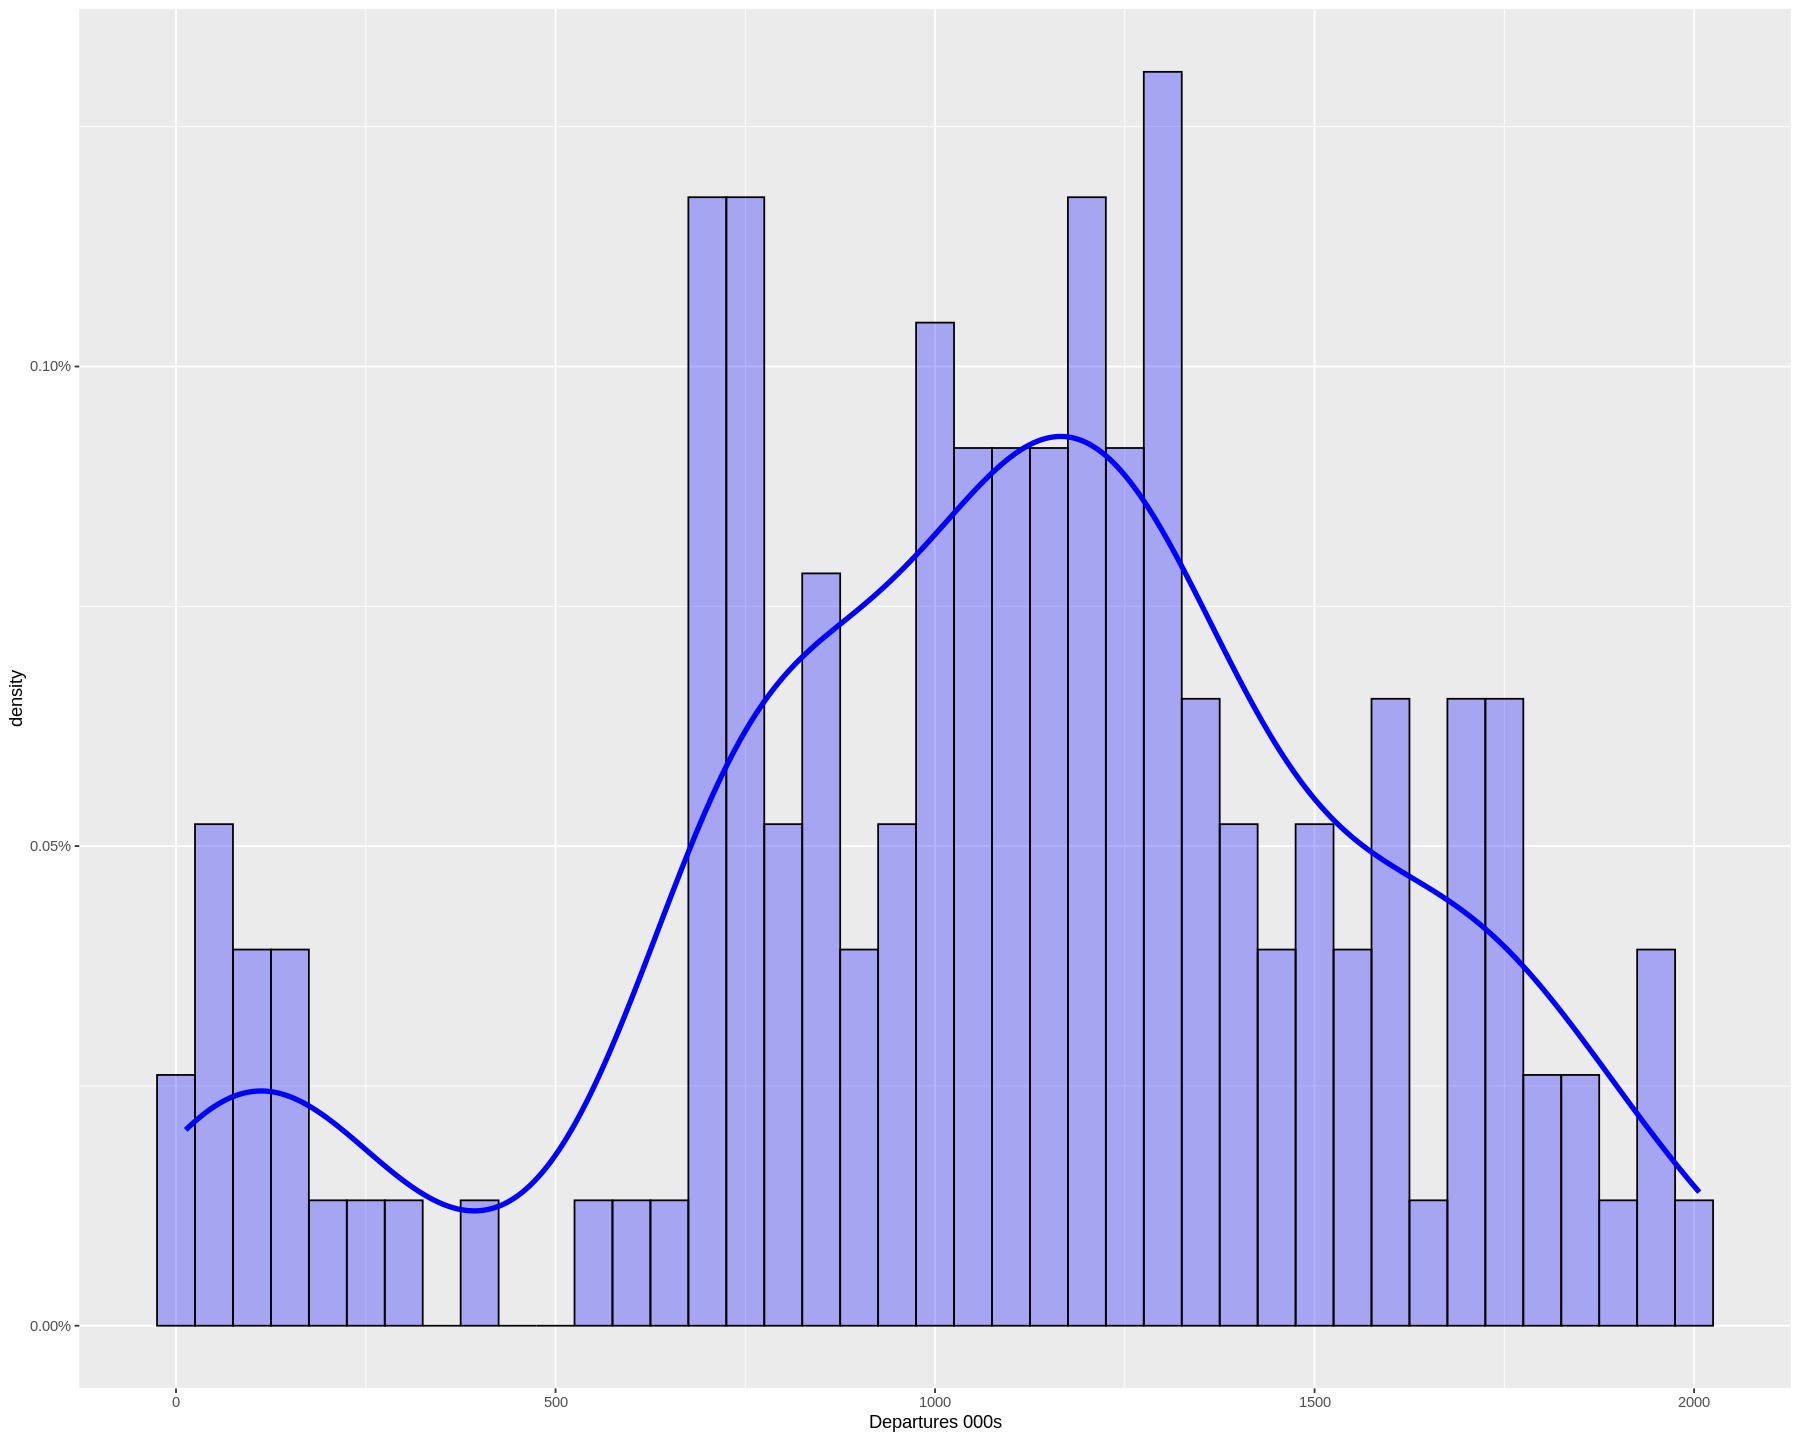

In [33]:
# Generate the histogram of departures
ggplot(ts_departs, aes(x = ts_departs,y=..density..)) + 
  geom_histogram(binwidth=50, fill = "blue", colour = "black", alpha=0.3)+
  geom_density(colour='blue', linewidth=1.5)+
  xlab('Departures 000s') +
  scale_y_continuous(breaks=c(0.001,0.0005,0),labels=percent)

In [34]:
# Window the data by year for the boxplot
d2010<-window(ts_departs,start=2010, end=2010.99)
d2011<-window(ts_departs,start=2011, end=2011.99)
d2012<-window(ts_departs,start=2012, end=2012.99)
d2013<-window(ts_departs,start=2013, end=2013.99)
d2014<-window(ts_departs,start=2014, end=2014.99)
d2015<-window(ts_departs,start=2014, end=2015.99)
d2016<-window(ts_departs,start=2016, end=2016.99)
d2017<-window(ts_departs,start=2017, end=2017.99)
d2018<-window(ts_departs,start=2018, end=2018.99)
d2019<-window(ts_departs,start=2019, end=2019.99)
d2020<-window(ts_departs,start=2020, end=2020.99)
d2021<-window(ts_departs,start=2021, end=2021.99)
d2022<-window(ts_departs,start=2022, end=2022.99)

Warning message in window.default(x, ...):
“'end' value not changed”


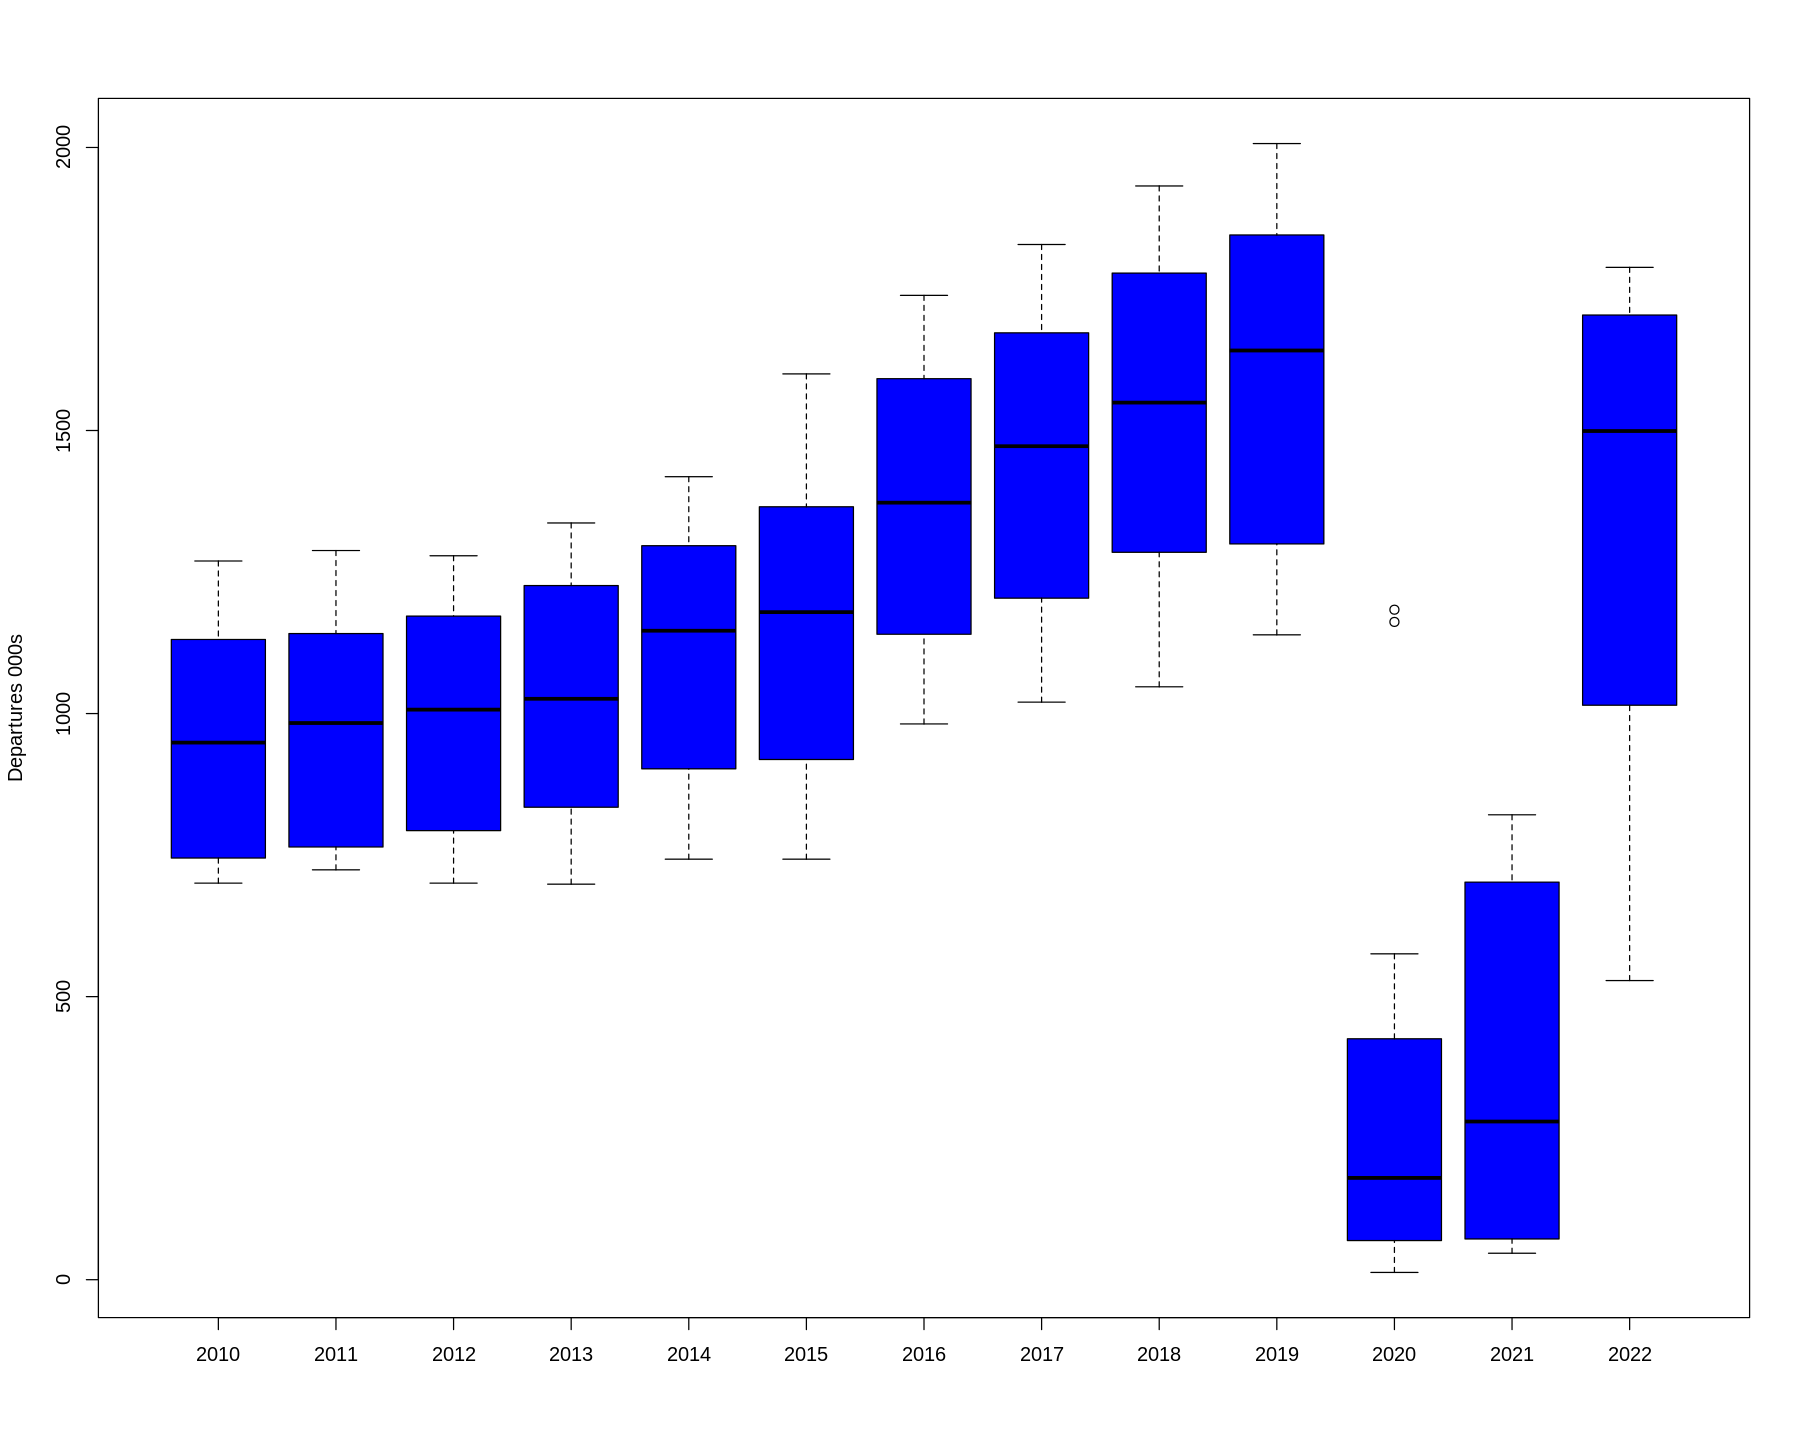

In [35]:
# Generate a boxplot with these

boxplot(d2010,d2011,d2012,d2013,d2014,d2015,d2016,d2017,d2018,d2019,d2020,d2021,d2022, 
        names=seq(2010,2022), ylab='Departures 000s',col='blue')


In [38]:
# T-tests
#Does the mean match in the two yearly buckets?  
#2013 v 2020
print('2013 v 2020')
(t.test(d2013,d2019,alternative='two.sided',var.equal=FALSE))['p.value']
# p.value=7.696756e-05, so REJECT null hypothesis of equal means


#2019 v 2020
print('2019 v 2020')
t.test(d2019,d2020,alternative='two.sided',var.equal=FALSE)['p.value']
# p.value=6.286207e-08, so REJECT null hypothesis of equal means

#2020 v 2022
print('2020 v 2022')
t.test(d2020,d2022,alternative='two.sided',var.equal=FALSE)['p.value']
# p.value=6.286207e-08, so REJECT null hypothesis of equal means


[1] "2013 v 2020"


$p.value
[1] 7.696756e-05

[1] "2019 v 2020"


$p.value
[1] 6.286207e-08

[1] "2020 v 2022"


$p.value
[1] 0.0001029825

## Seasonality
Plot the seasonality - monthly range
Horizontal bars are the means of each month
Graph shows strong summer seasonality

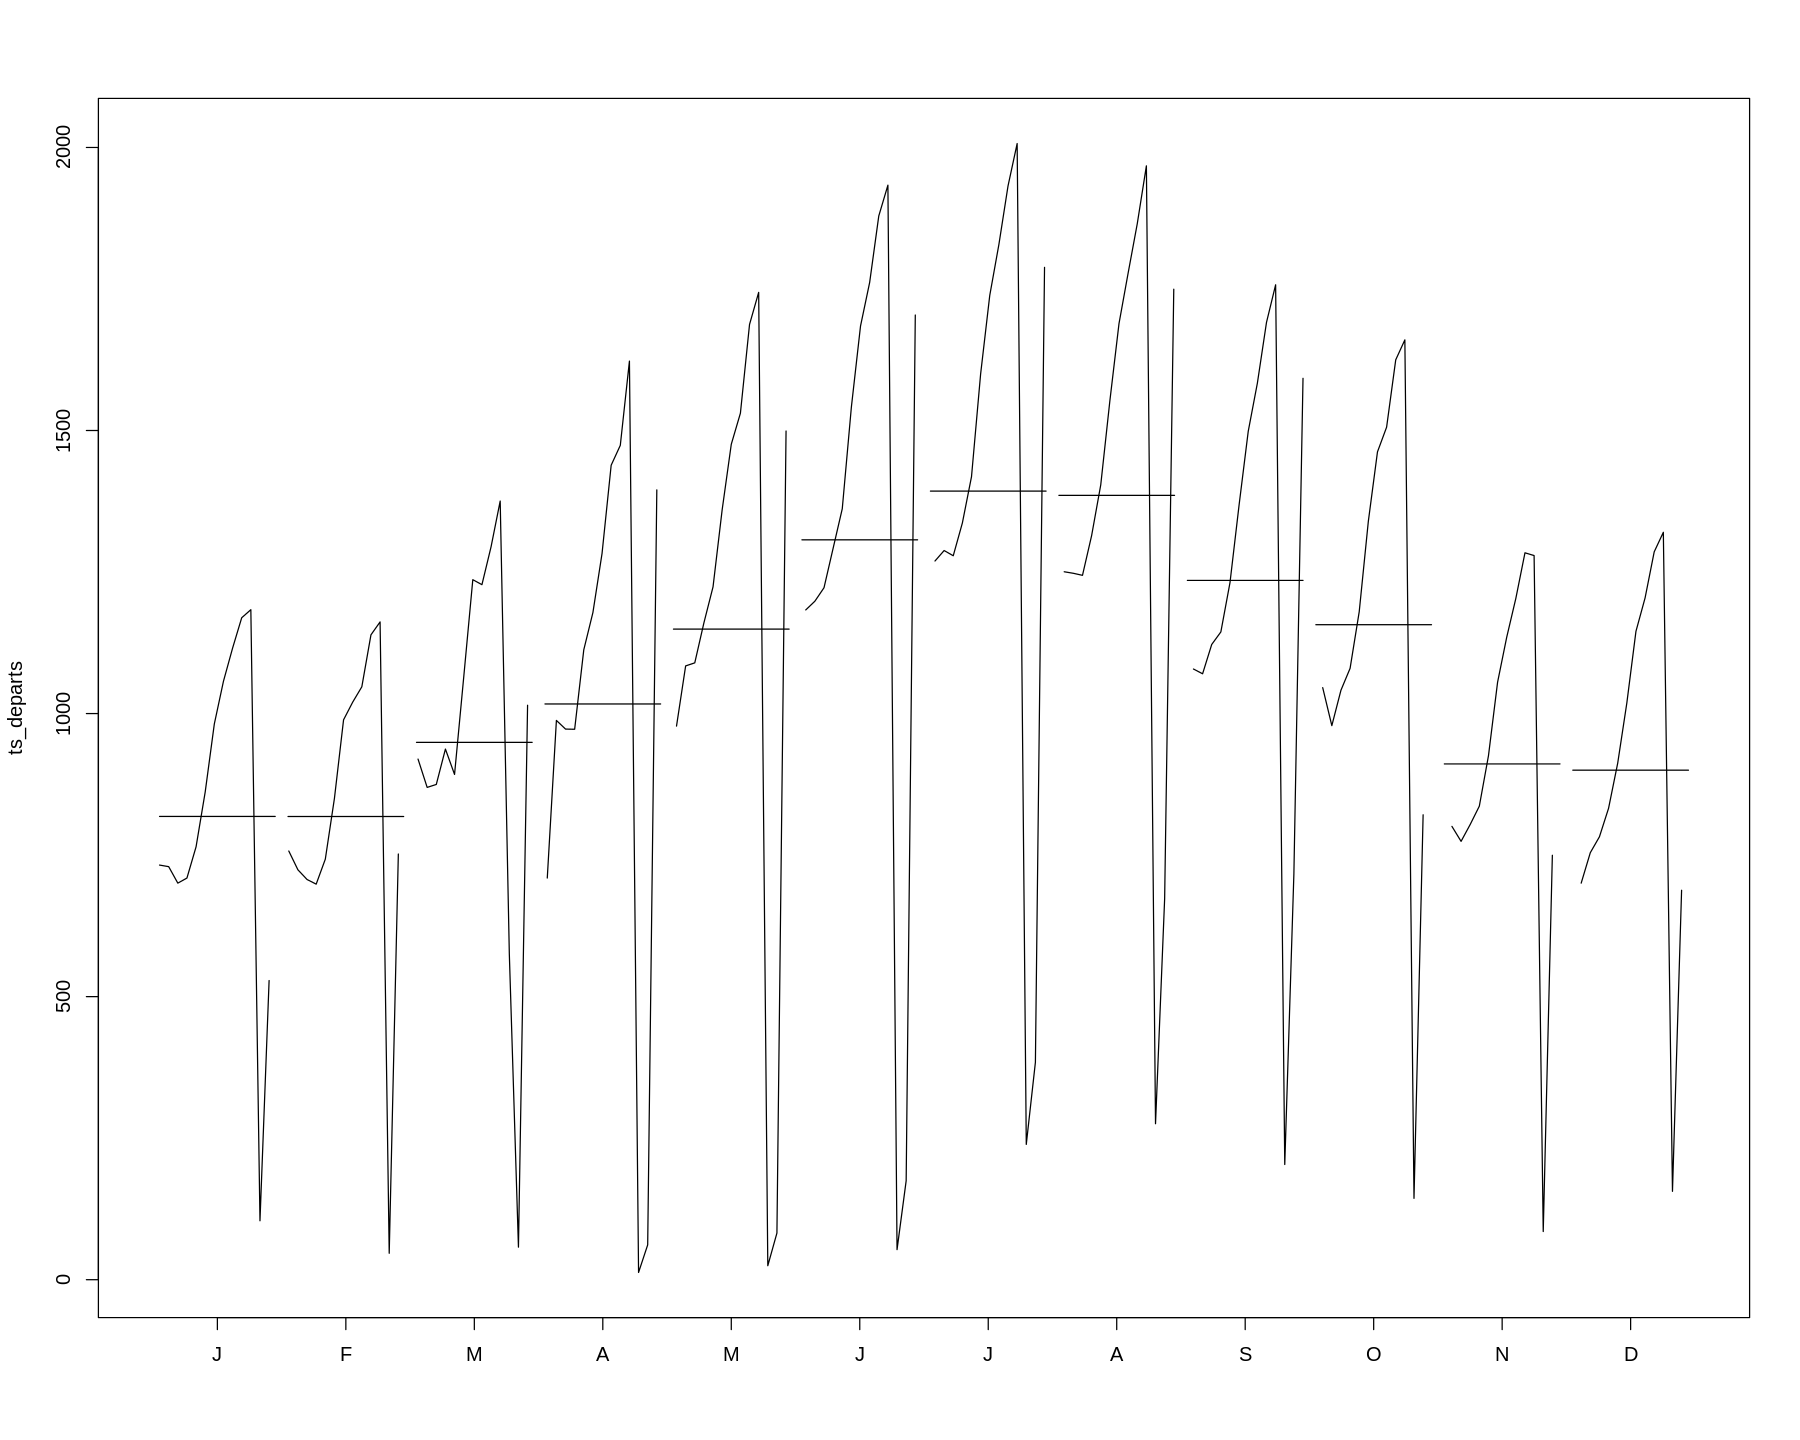

In [45]:
monthplot(ts_departs)

Clear and consistent seasonality every year apart from the collapse in 2020 and the progressive growth in 2021 with the collapse dating to February 2020

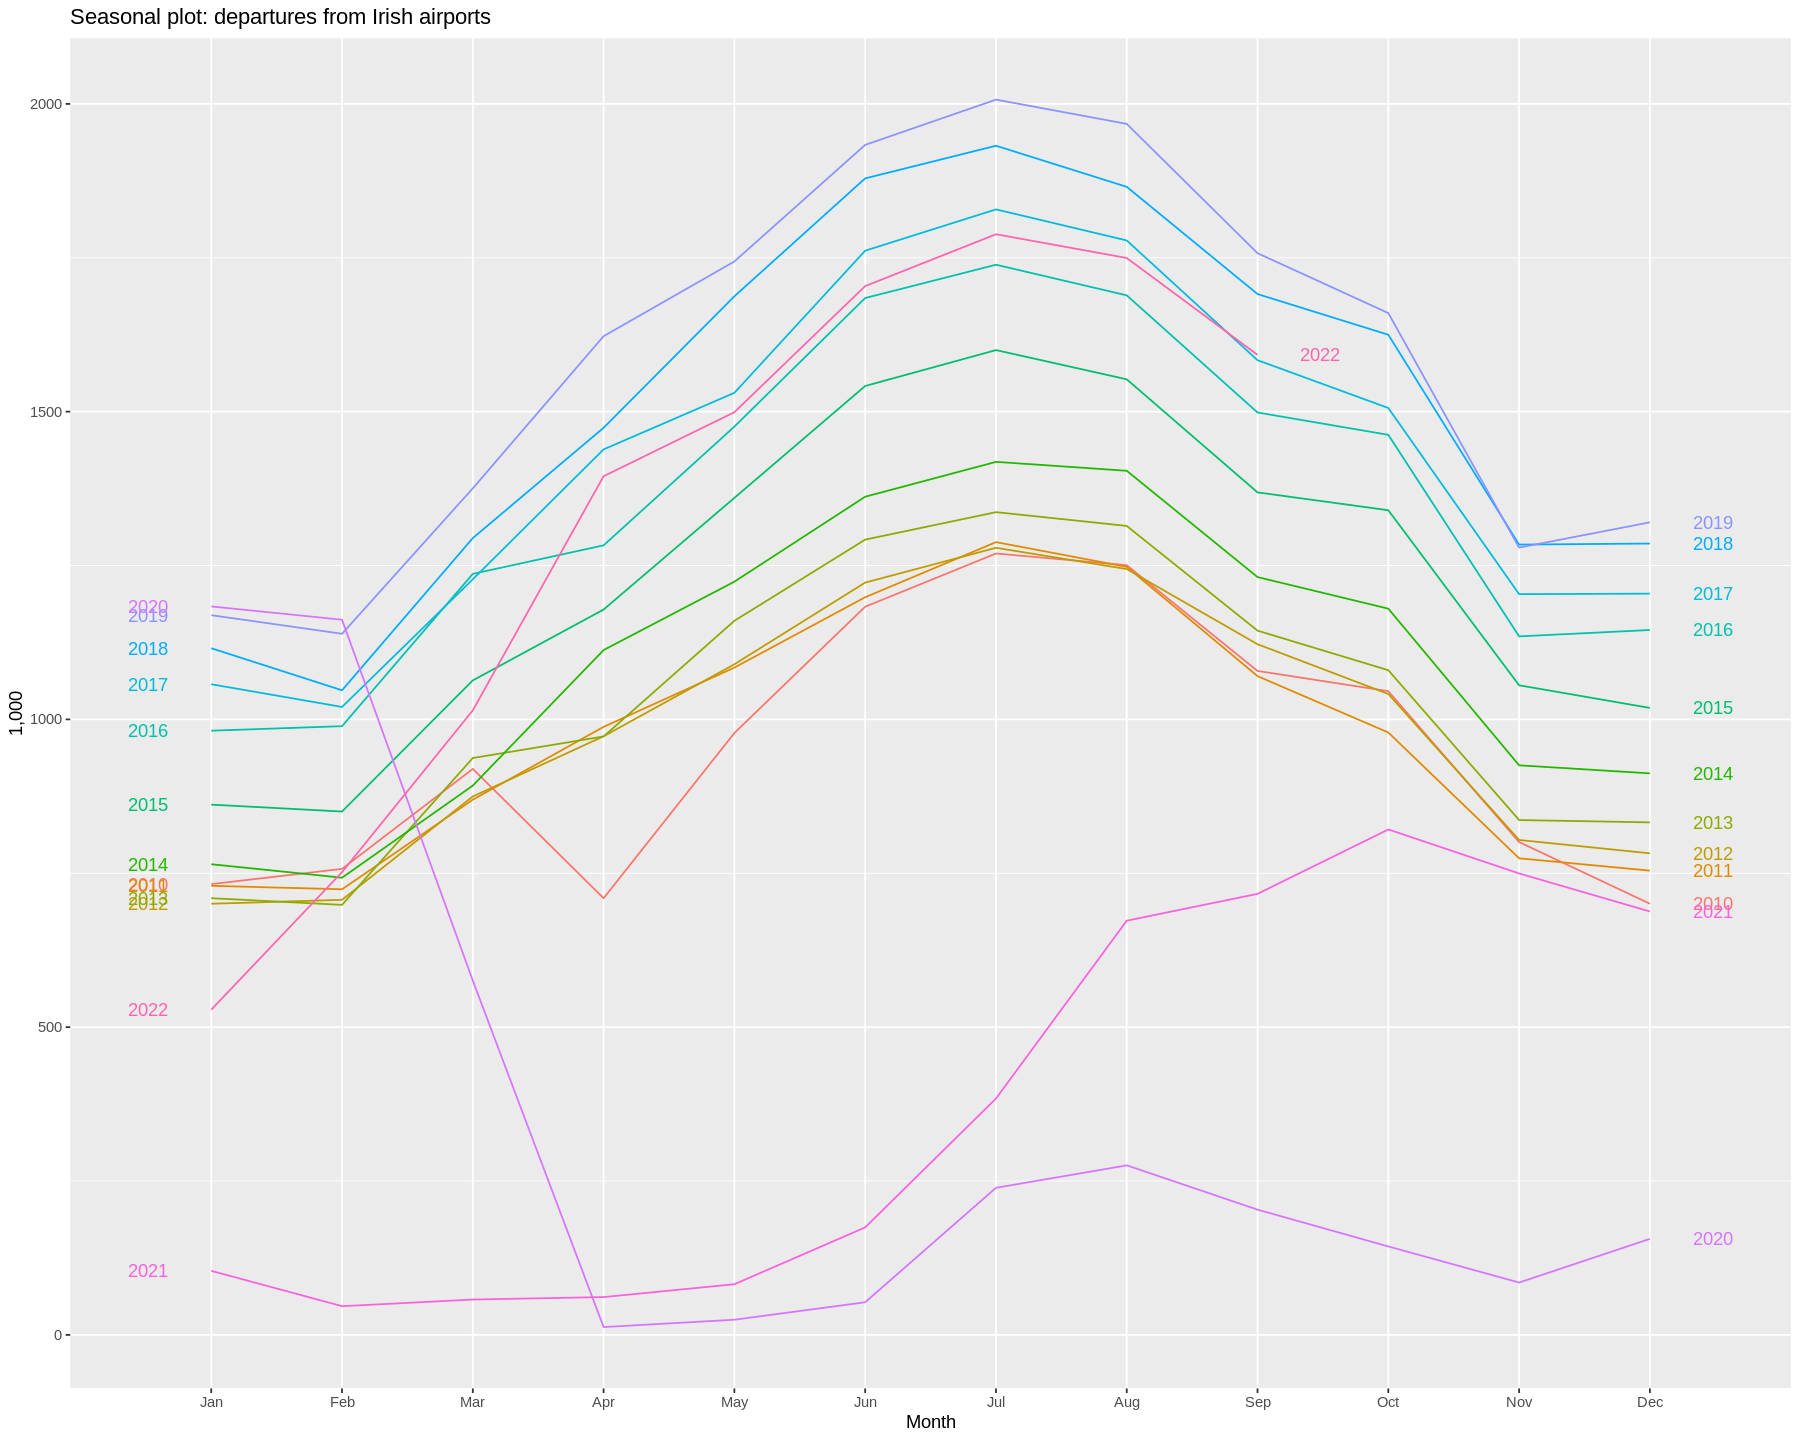

In [46]:
ggseasonplot(ts_departs,year.labels=TRUE, year.labels.left=TRUE) + ylab('1,000') + ggtitle("Seasonal plot: departures from Irish airports")


## Training and testing datasets
Objective is to 'forecast the departures in the first 6 months of 2021'
This can be our test dataset to evaluate the models 
The data before then would be the training data,  
to be used for estimating and validating the model 


In [49]:
ts_departs_train<-window(ts_departs, start = c(2010,1), end = c(2020,12))
ts_departs_test<-window(ts_departs, start = c(2021,1), end = c(2021,6))
ts_departs_train

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,732.4,757.2,919.6,709.5,977.9,1183.1,1269.5,1250.5,1078.7,1045.8,800.7,700.5
2011,729.6,724.0,869.6,987.9,1084.2,1198.5,1288.0,1247.8,1070.3,978.7,774.3,754.3
2012,700.5,706.9,874.8,972.6,1089.6,1222.3,1278.8,1244.2,1122.1,1041.3,804.1,782.4
2013,709.5,698.7,937.3,972.3,1160.2,1292.1,1336.7,1314.3,1144.2,1079.9,836.5,832.7
2014,764.7,742.8,892.5,1112.7,1223.8,1361.8,1418.4,1403.9,1231.2,1179.9,925.4,912.3
2015,861.5,850.3,1063.4,1178.5,1359.9,1541.7,1600.0,1552.5,1368.8,1339.8,1055.4,1018.6
2016,981.7,989.0,1236.5,1282.8,1475.7,1684.6,1738.7,1688.9,1498.6,1462.3,1134.9,1145.3
2017,1057.1,1020.2,1227.7,1438.7,1530.6,1761.5,1828.6,1778.1,1583.6,1505.9,1203.5,1204.3
2018,1115.6,1047.3,1294.6,1473.8,1687.4,1879.0,1932.0,1865.2,1691.0,1624.9,1284.0,1285.7
2019,1169.3,1139.1,1375.4,1622.6,1744.0,1933.4,2006.9,1967.5,1757.4,1660.1,1279.1,1320.2


# Exponential Smoothing Models

 Use ETS to automatically fit and evaluate an exponential smoothing model

## Estimation

In [65]:
departs_fit1<-ets(y=ts_departs_train,model='ZZZ',damped=TRUE)

In [66]:
departs_fit1

ETS(A,Ad,A) 

Call:
 ets(y = ts_departs_train, model = "ZZZ", damped = TRUE) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.1413 
    gamma = 1e-04 
    phi   = 0.8 

  Initial states:
    l = 962.4632 
    b = 4.7834 
    s = -208.2974 -202.7917 72.2755 130.9762 307.6094 349.7194
           233.3971 73.3278 -65.9956 -144.2698 -278.4757 -267.4752

  sigma:  107.7625

     AIC     AICc      BIC 
1897.832 1903.886 1949.723 

In [67]:
summary(departs_fit1)

ETS(A,Ad,A) 

Call:
 ets(y = ts_departs_train, model = "ZZZ", damped = TRUE) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.1413 
    gamma = 1e-04 
    phi   = 0.8 

  Initial states:
    l = 962.4632 
    b = 4.7834 
    s = -208.2974 -202.7917 72.2755 130.9762 307.6094 349.7194
           233.3971 73.3278 -65.9956 -144.2698 -278.4757 -267.4752

  sigma:  107.7625

     AIC     AICc      BIC 
1897.832 1903.886 1949.723 

Training set error measures:
                    ME     RMSE     MAE       MPE     MAPE      MASE      ACF1
Training set -2.425368 100.5841 52.8242 -30.07175 41.14341 0.2738436 0.2759947

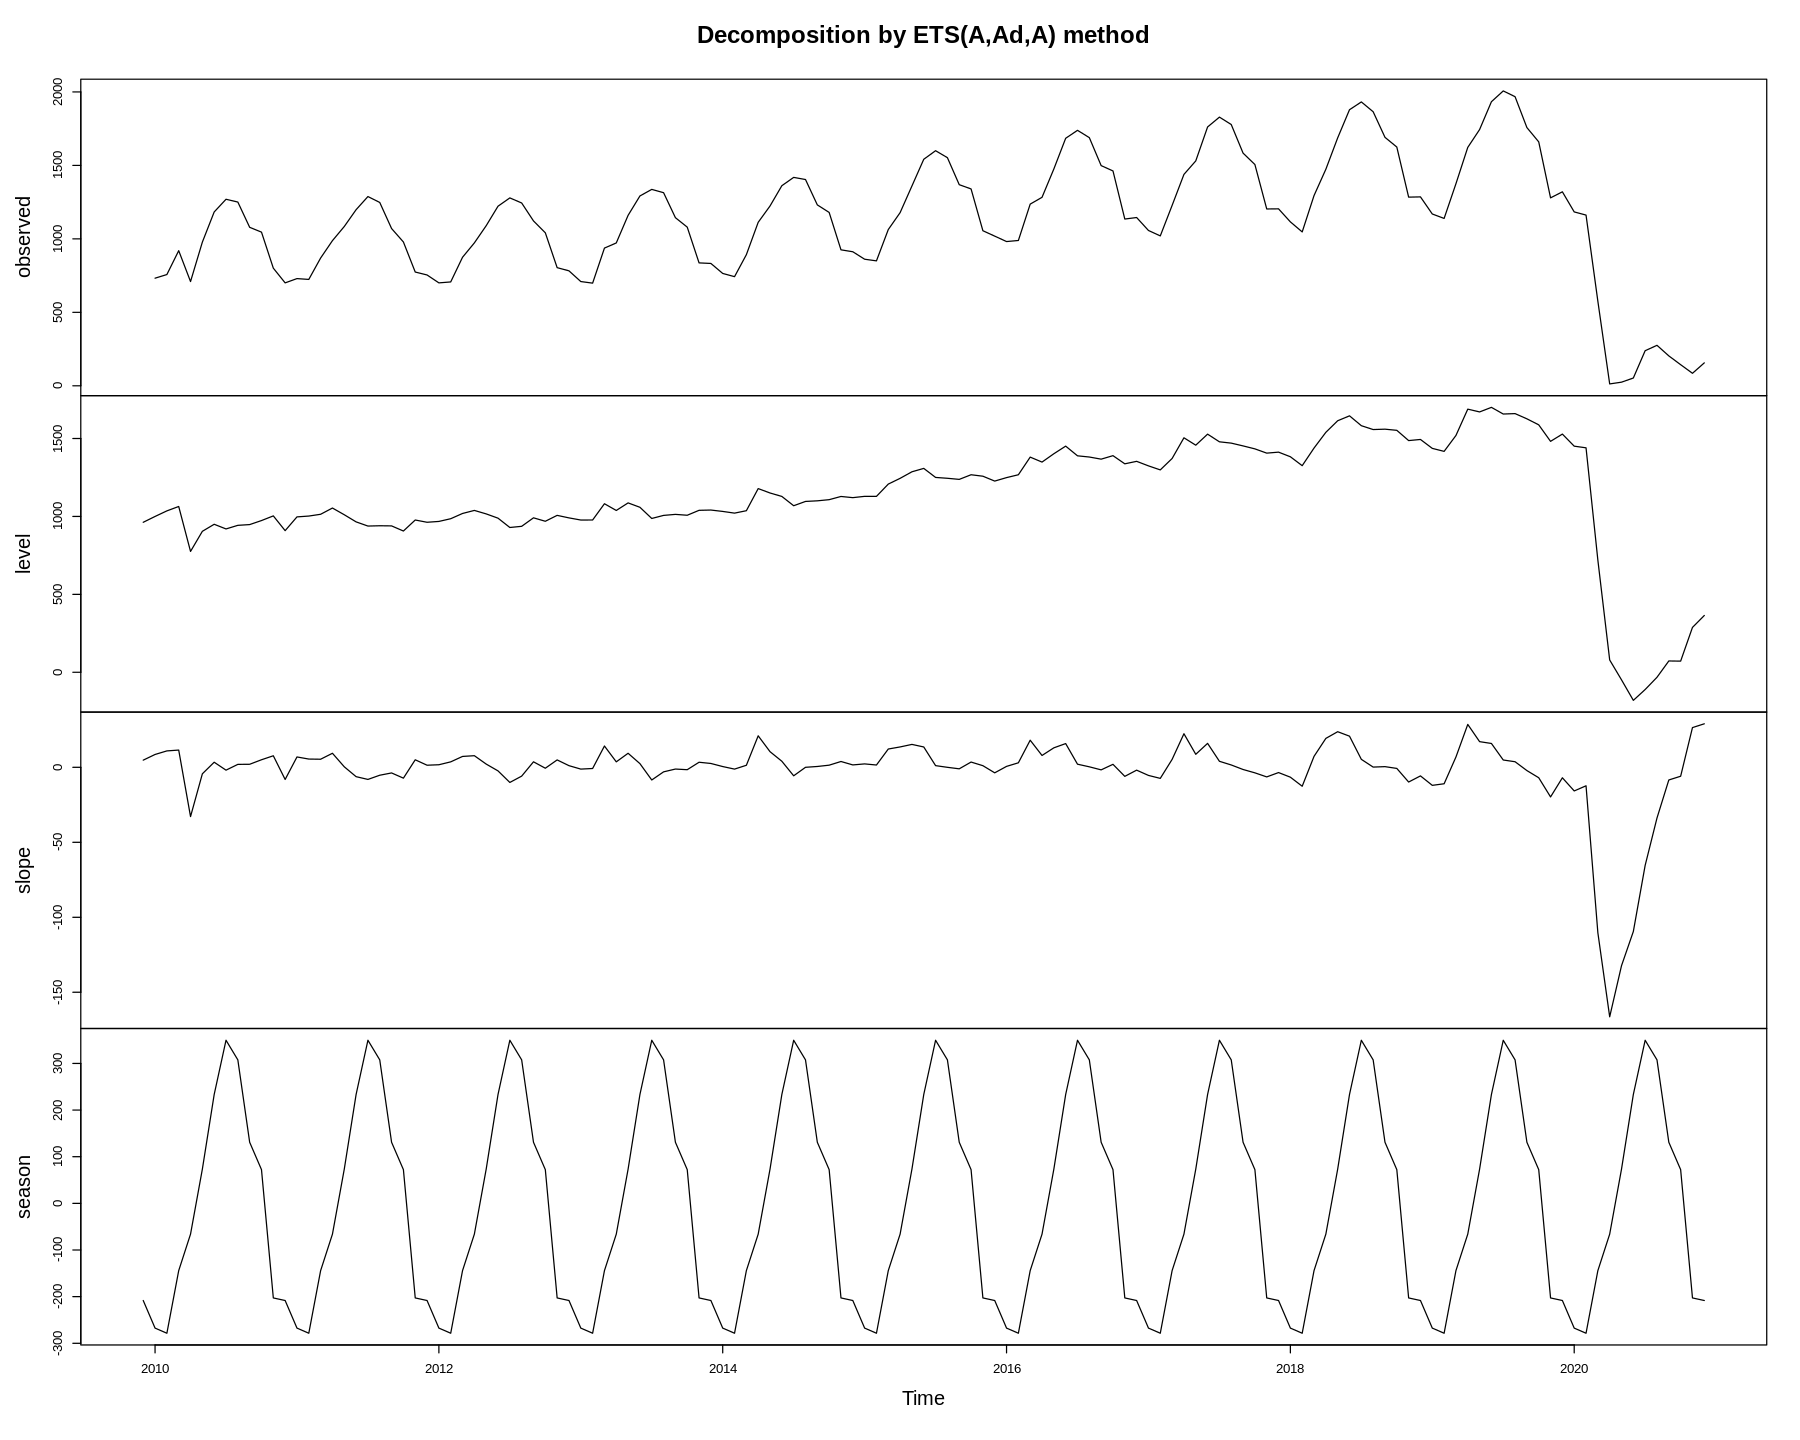

In [68]:
plot(departs_fit1)

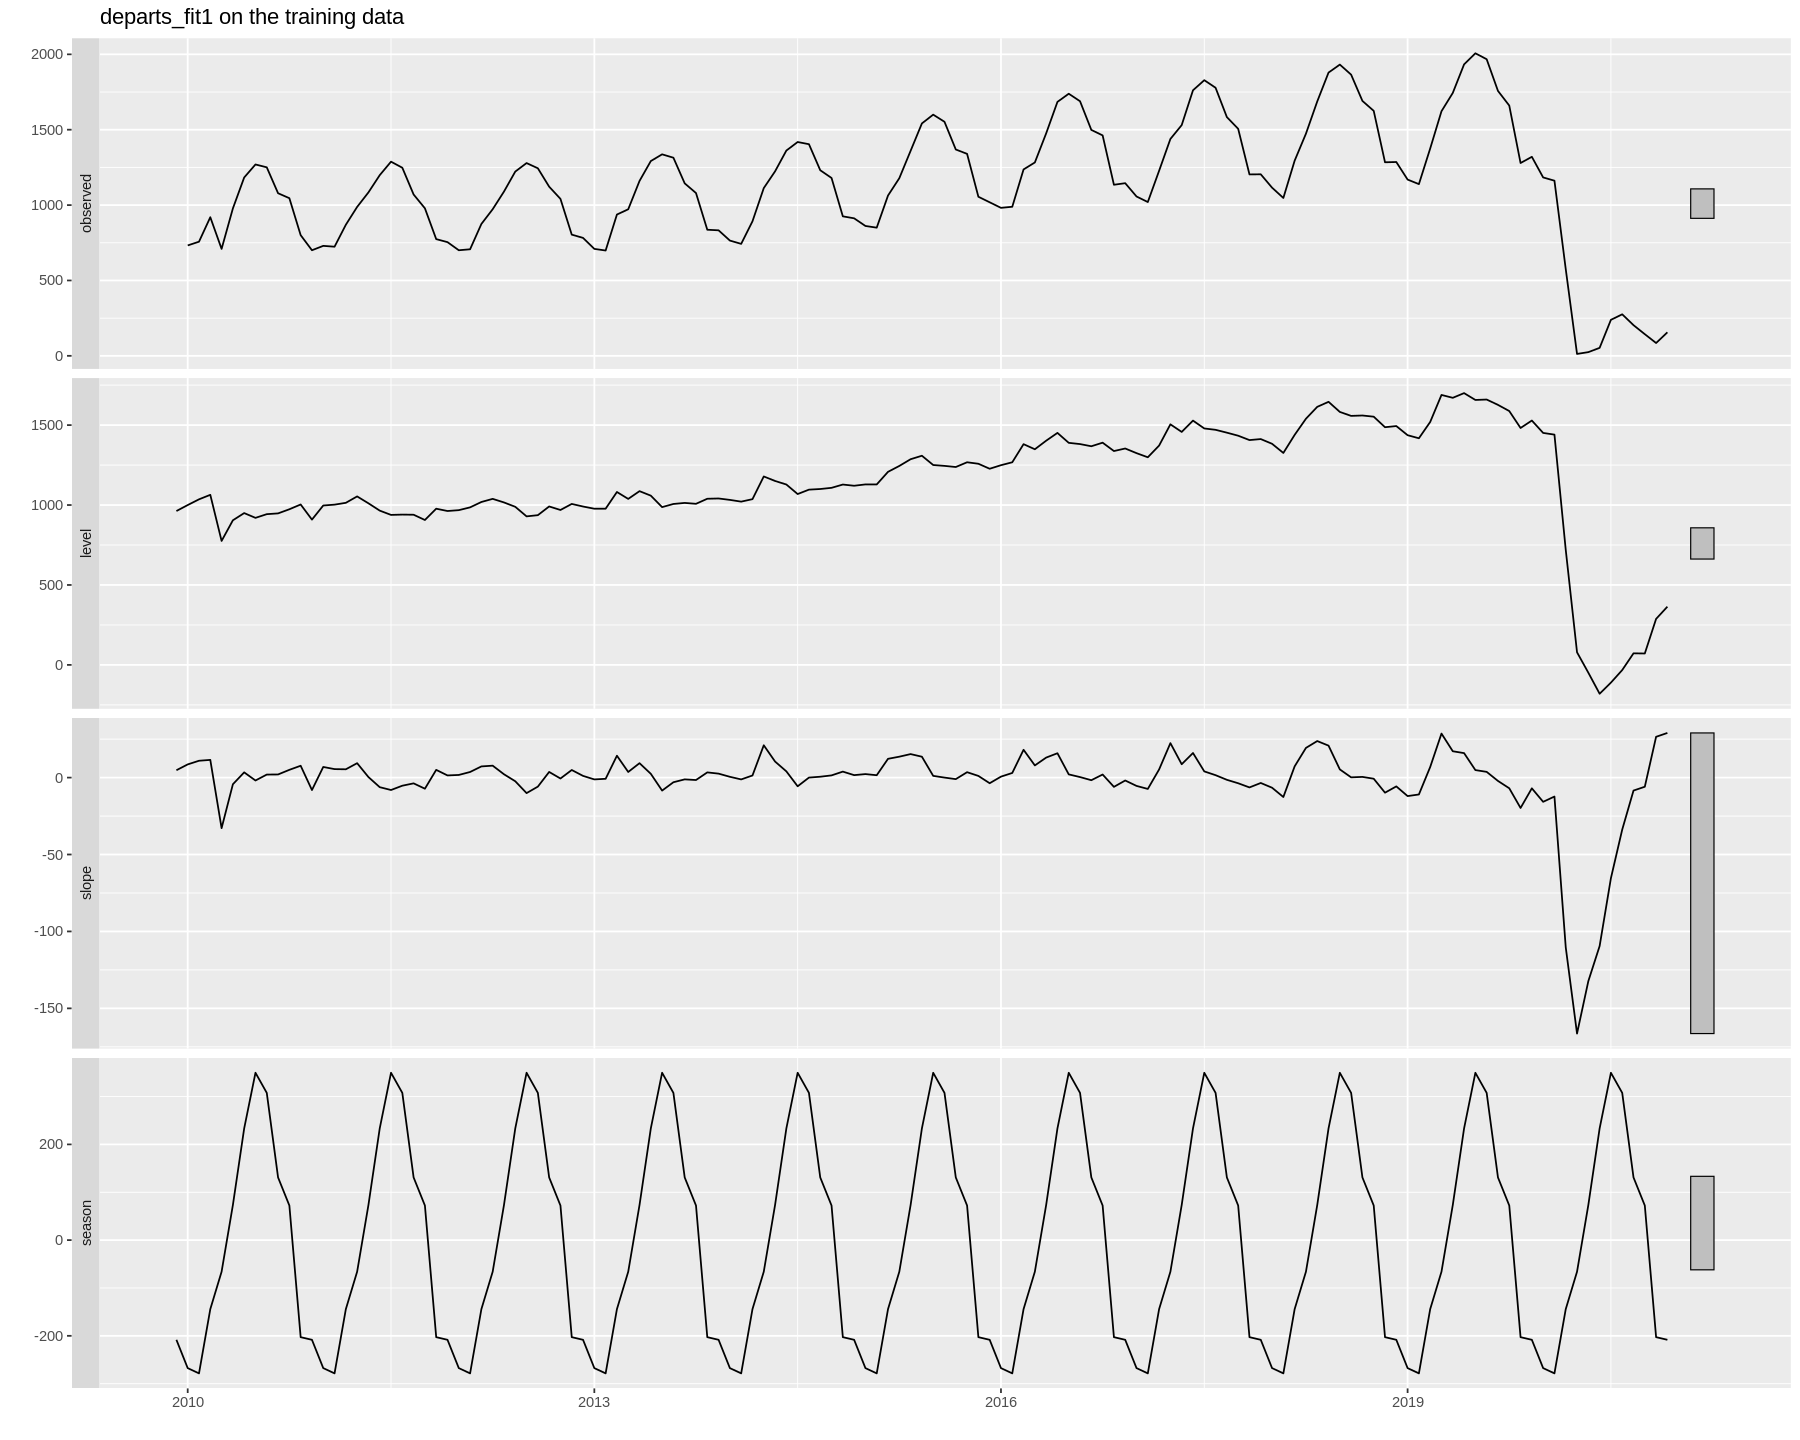

In [69]:
autoplot(departs_fit1, main='departs_fit1 on the training data')

In [77]:
departs_fit2<-ets(ts_departs_train,model="AAA",use.initial.values = TRUE)
departs_fit2

ETS(A,Ad,A) 

Call:
 ets(y = ts_departs_train, model = "AAA", use.initial.values = TRUE) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.1413 
    gamma = 1e-04 
    phi   = 0.8 

  Initial states:
    l = 962.4632 
    b = 4.7834 
    s = -208.2974 -202.7917 72.2755 130.9762 307.6094 349.7194
           233.3971 73.3278 -65.9956 -144.2698 -278.4757 -267.4752

  sigma:  107.7625

     AIC     AICc      BIC 
1897.832 1903.886 1949.723 

The fit1 and fit2 parameters and initial states are the same 

Estimate departs_fit3, same as fit1 but without damping component

In [79]:
departs_fit3<-hw(ts_departs_train,damped=FALSE,seasonal="additive")
summary(departs_fit3)


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(y = ts_departs_train, seasonal = "additive", damped = FALSE) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.0137 
    gamma = 1e-04 

  Initial states:
    l = 963.2346 
    b = 7.2359 
    s = -208.1595 -202.943 72.9792 130.8309 307.7921 349.7476
           233.4324 73.3067 -65.2919 -143.9432 -278.8151 -268.9363

  sigma:  111.3604

     AIC     AICc      BIC 
1905.646 1911.014 1954.653 

Error measures:
                    ME     RMSE      MAE       MPE    MAPE      MASE     ACF1
Training set -9.089778 104.3934 53.82661 -40.31534 50.4259 0.2790401 0.375125

Forecasts:
         Point Forecast      Lo 80     Hi 80       Lo 95     Hi 95
Jan 2021       86.09848  -56.61566  228.8126  -132.16396  304.3609
Feb 2021       66.99705 -136.20984  270.2039  -243.78107  377.7752
Mar 2021      192.64903  -57.92808  443.2261  -190.57558  575.8736
Apr 2021      262.04848  -29.263

## Diagnosis

AR order 1 showing in ACF  
ACF shows no other significant correlations  
Ljung-Box test  

data:  Residuals from ETS(A,Ad,A)  
Q* = 22.878, df = 7, p-value = 0.00179  
Low probability score means rejects null hypothesis of independence in the time series residuals  



	Ljung-Box test

data:  Residuals from ETS(A,Ad,A)
Q* = 22.878, df = 7, p-value = 0.00179

Model df: 17.   Total lags used: 24



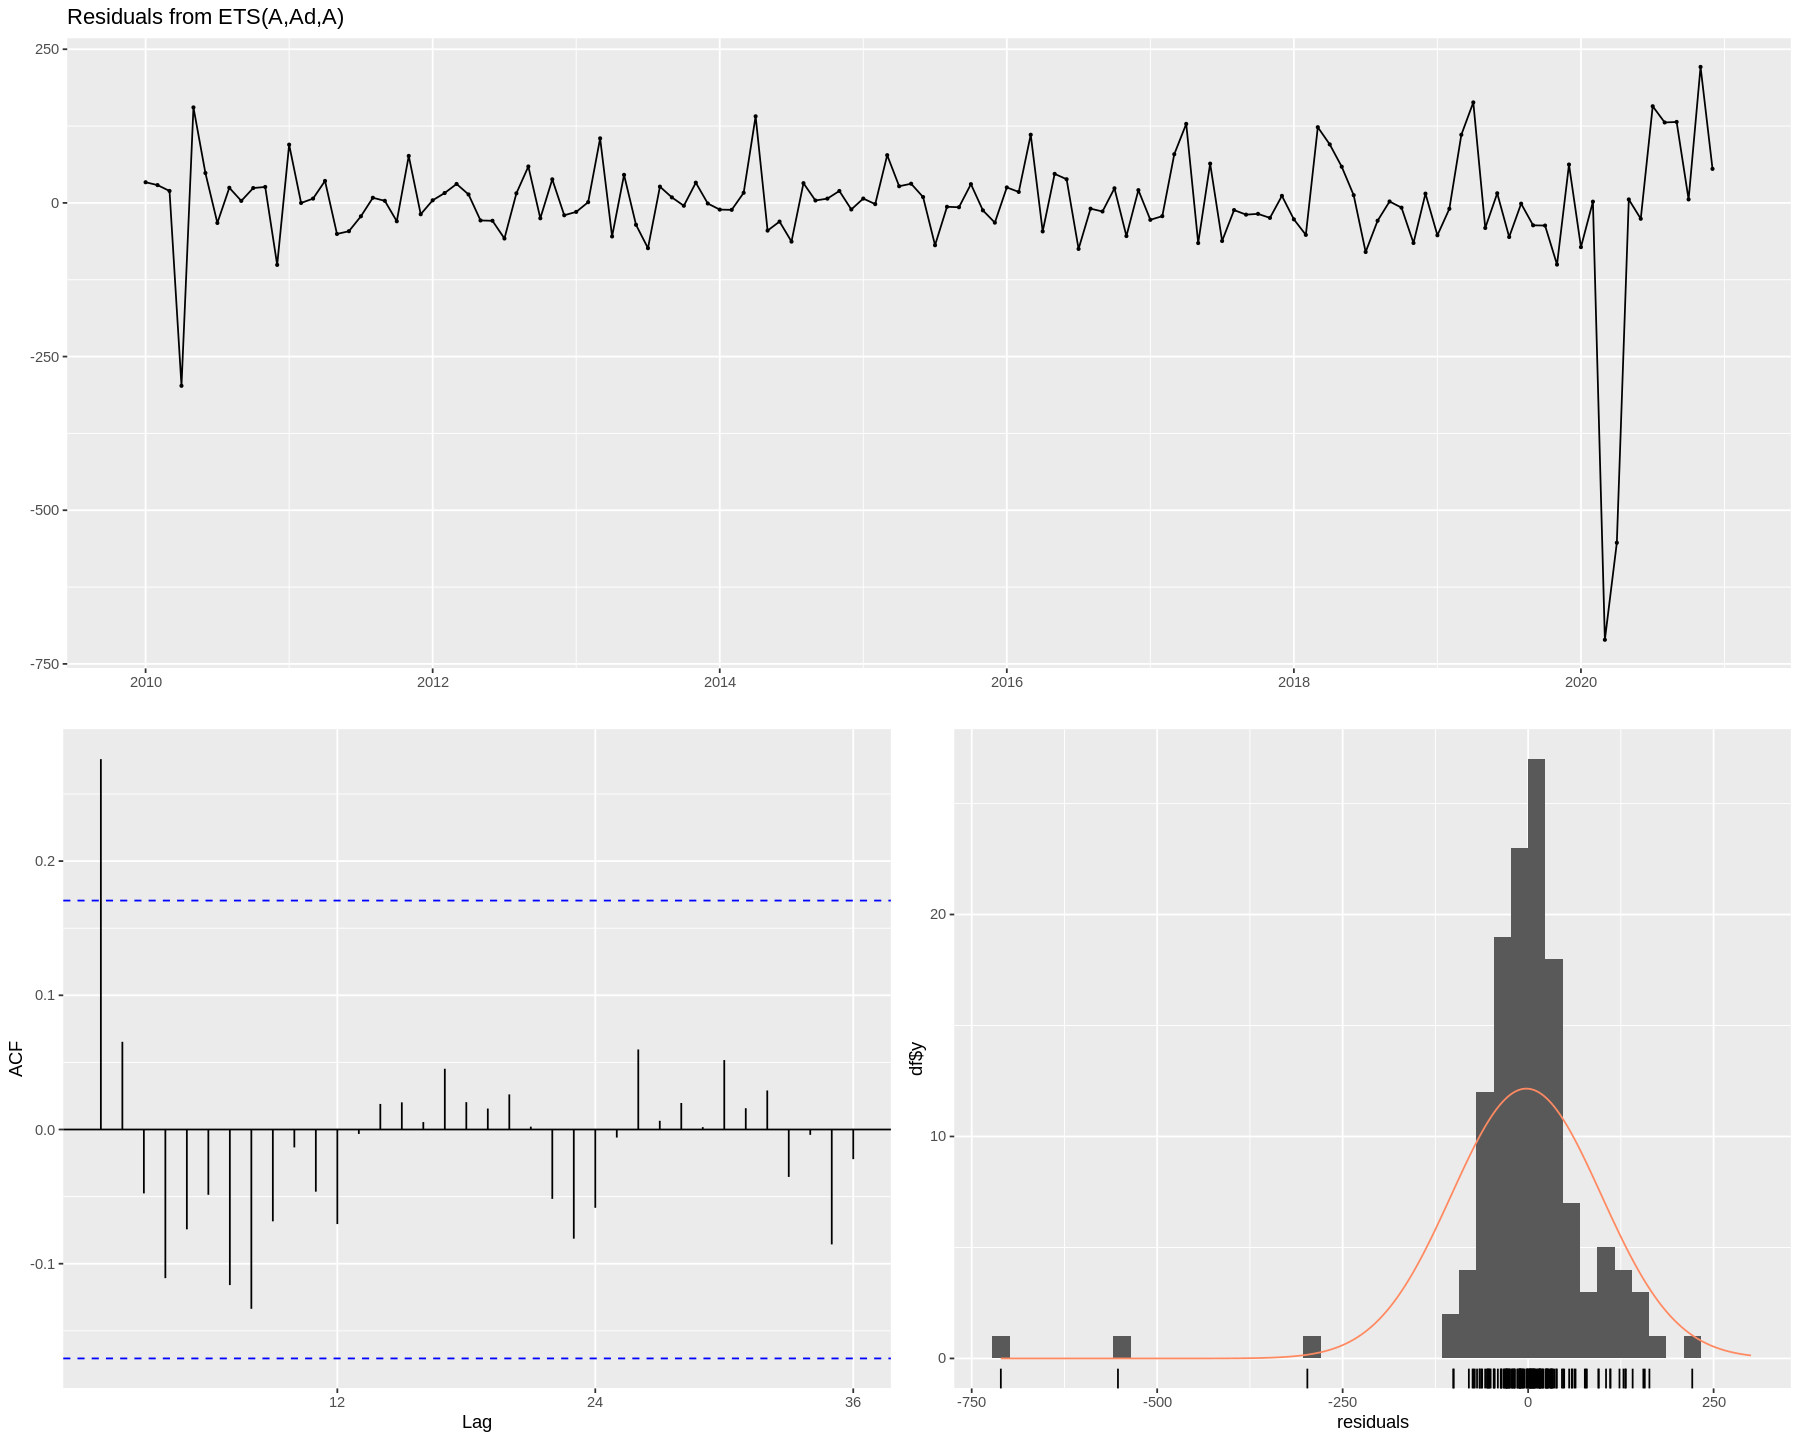

In [81]:
checkresiduals(departs_fit1)


In [83]:
Box.test(x = residuals(departs_fit1),type='Ljung-Box')


	Box-Ljung test

data:  residuals(departs_fit1)
X-squared = 10.285, df = 1, p-value = 0.001341


In [85]:
residuals1=residuals(departs_fit1)


	Jarque Bera Test

data:  residuals1
X-squared = 3370.8, df = 2, p-value < 2.2e-16


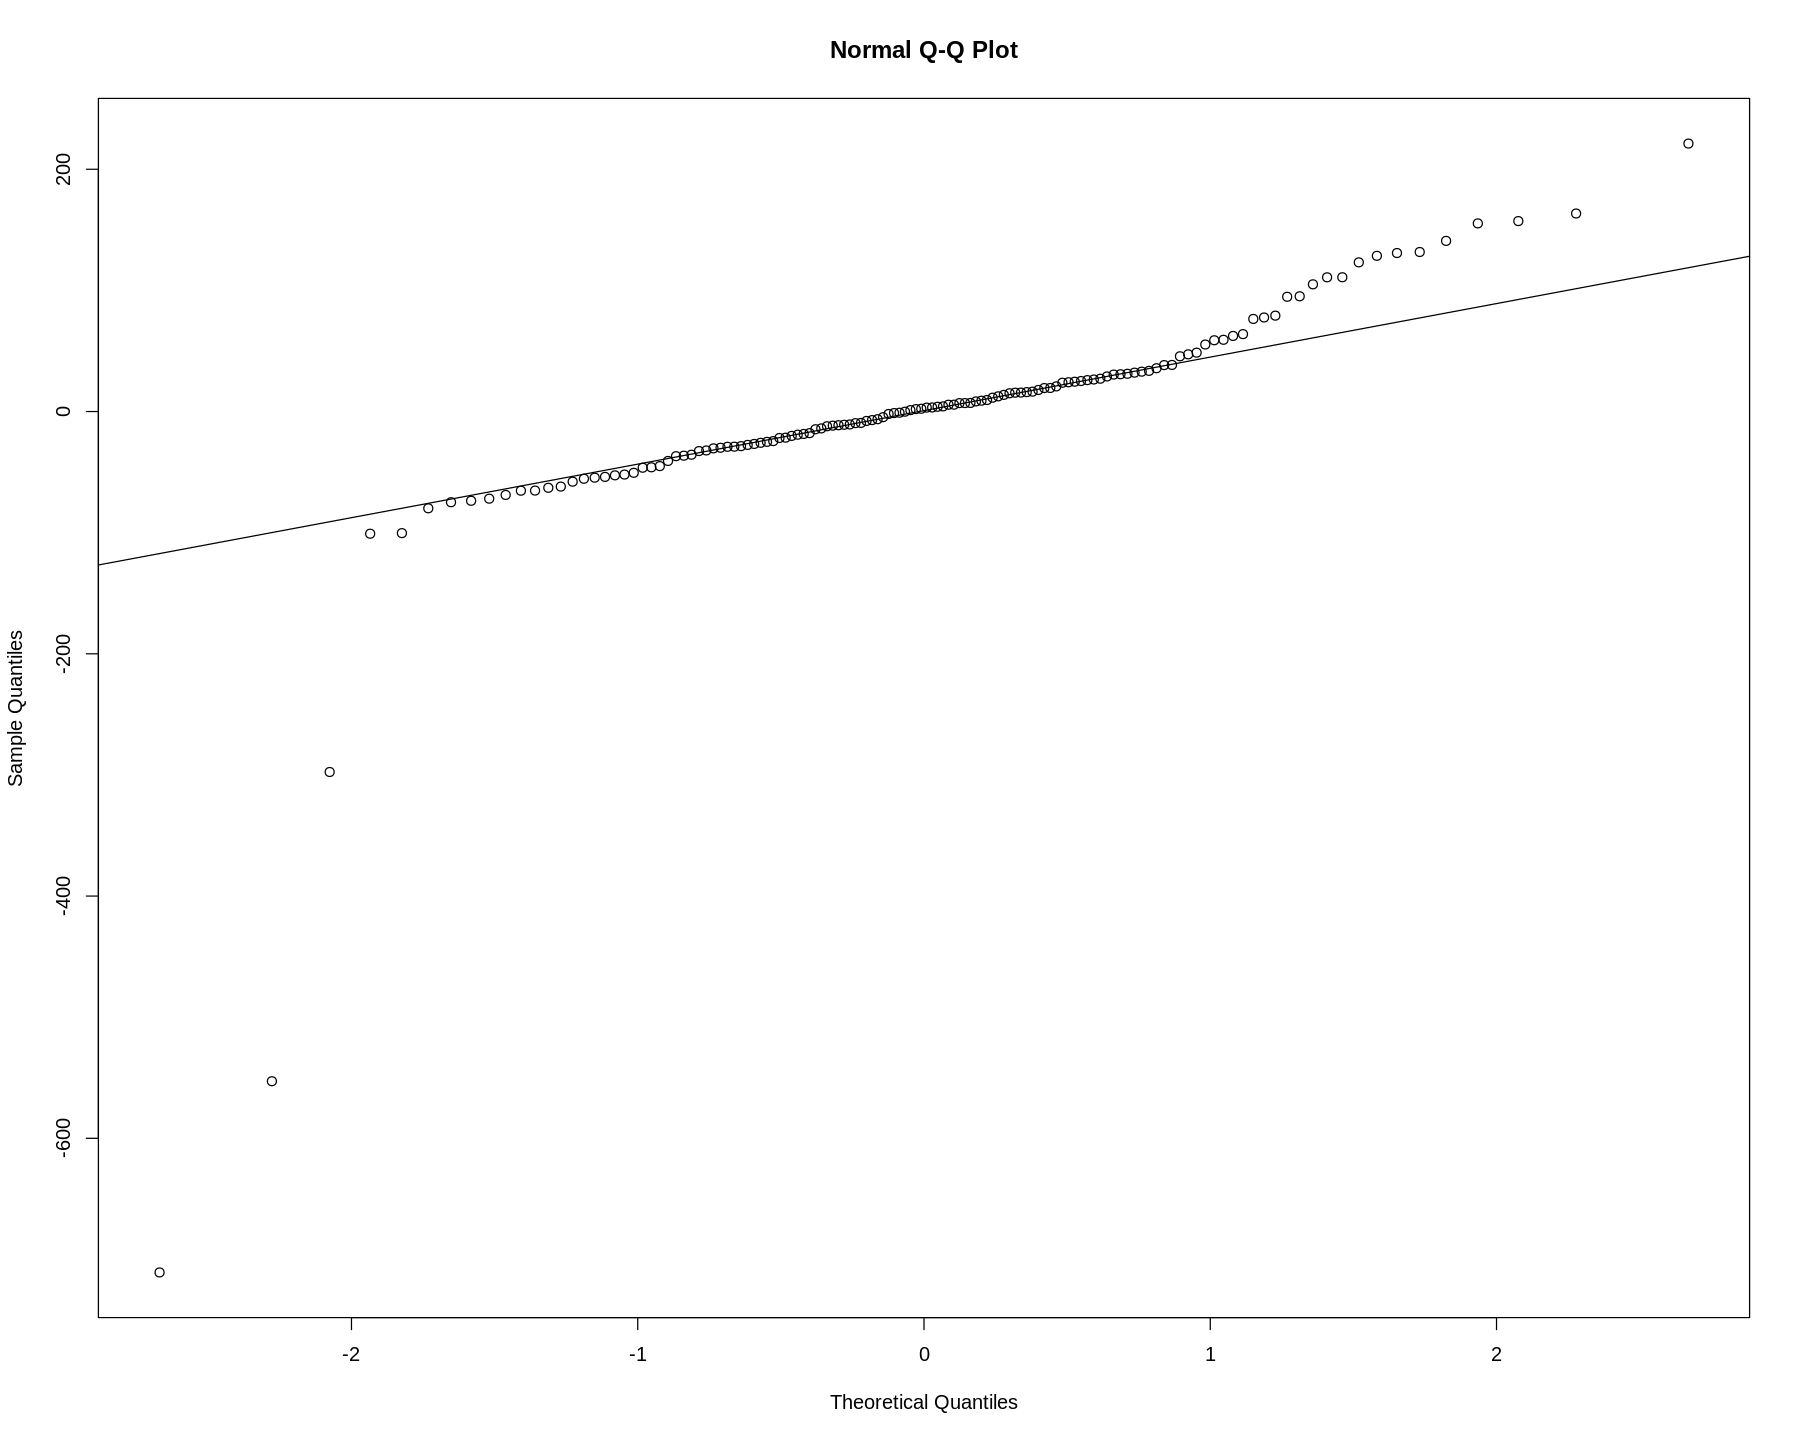

In [88]:
qqnorm(residuals(departs_fit1)); qqline(residuals(departs_fit1))
jarque.bera.test(residuals1)

#QQ plot and JB indicate residuals aren't normal
#not white noise, p-value near zero 

## Forecasts

In [92]:
ts_departs_test

,Jan,Feb,Mar,Apr,May,Jun
2021,104.1,46.7,57.5,61.5,82.4,174.7


In [94]:
mean(ts_departs_test)


[1] 87.81667

In [95]:
sd(ts_departs_test)

[1] 47.21324

In [96]:
forecast(departs_fit1,h=6) # 

         Point Forecast     Lo 80     Hi 80      Lo 95     Hi 95
Jan 2021       120.1400 -17.96313  258.2432  -91.07053  331.3506
Feb 2021       127.7165 -78.91624  334.3493 -188.30103  443.7341
Mar 2021       276.7834  11.60873  541.9580 -128.76624  682.3329
Apr 2021       366.9147  48.54473  685.2846 -119.99014  853.8195
May 2021       515.7952 147.98794  883.6024  -46.71744 1078.3078
Jun 2021       683.4642 269.21589 1097.7125   49.92609 1317.0023

In [97]:
accuracy(departs_fit1,h=6)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-2.425368,100.5841,52.8242,-30.07175,41.14341,0.2738436,0.2759947


Error is $y - \hat{y}$

In [100]:
ts_departs_test-forecast(departs_fit1,h=6)$mean 

,Jan,Feb,Mar,Apr,May,Jun
2021,-16.04004,-81.01654,-219.28335,-305.41467,-433.39517,-508.76419


In [101]:
mean(ts_departs_test-forecast(departs_fit1,h=6)$mean) 

[1] -260.6523

In [102]:
sd((forecast(departs_fit1,h=6))$mean) # = 222.0652

[1] 222.0652

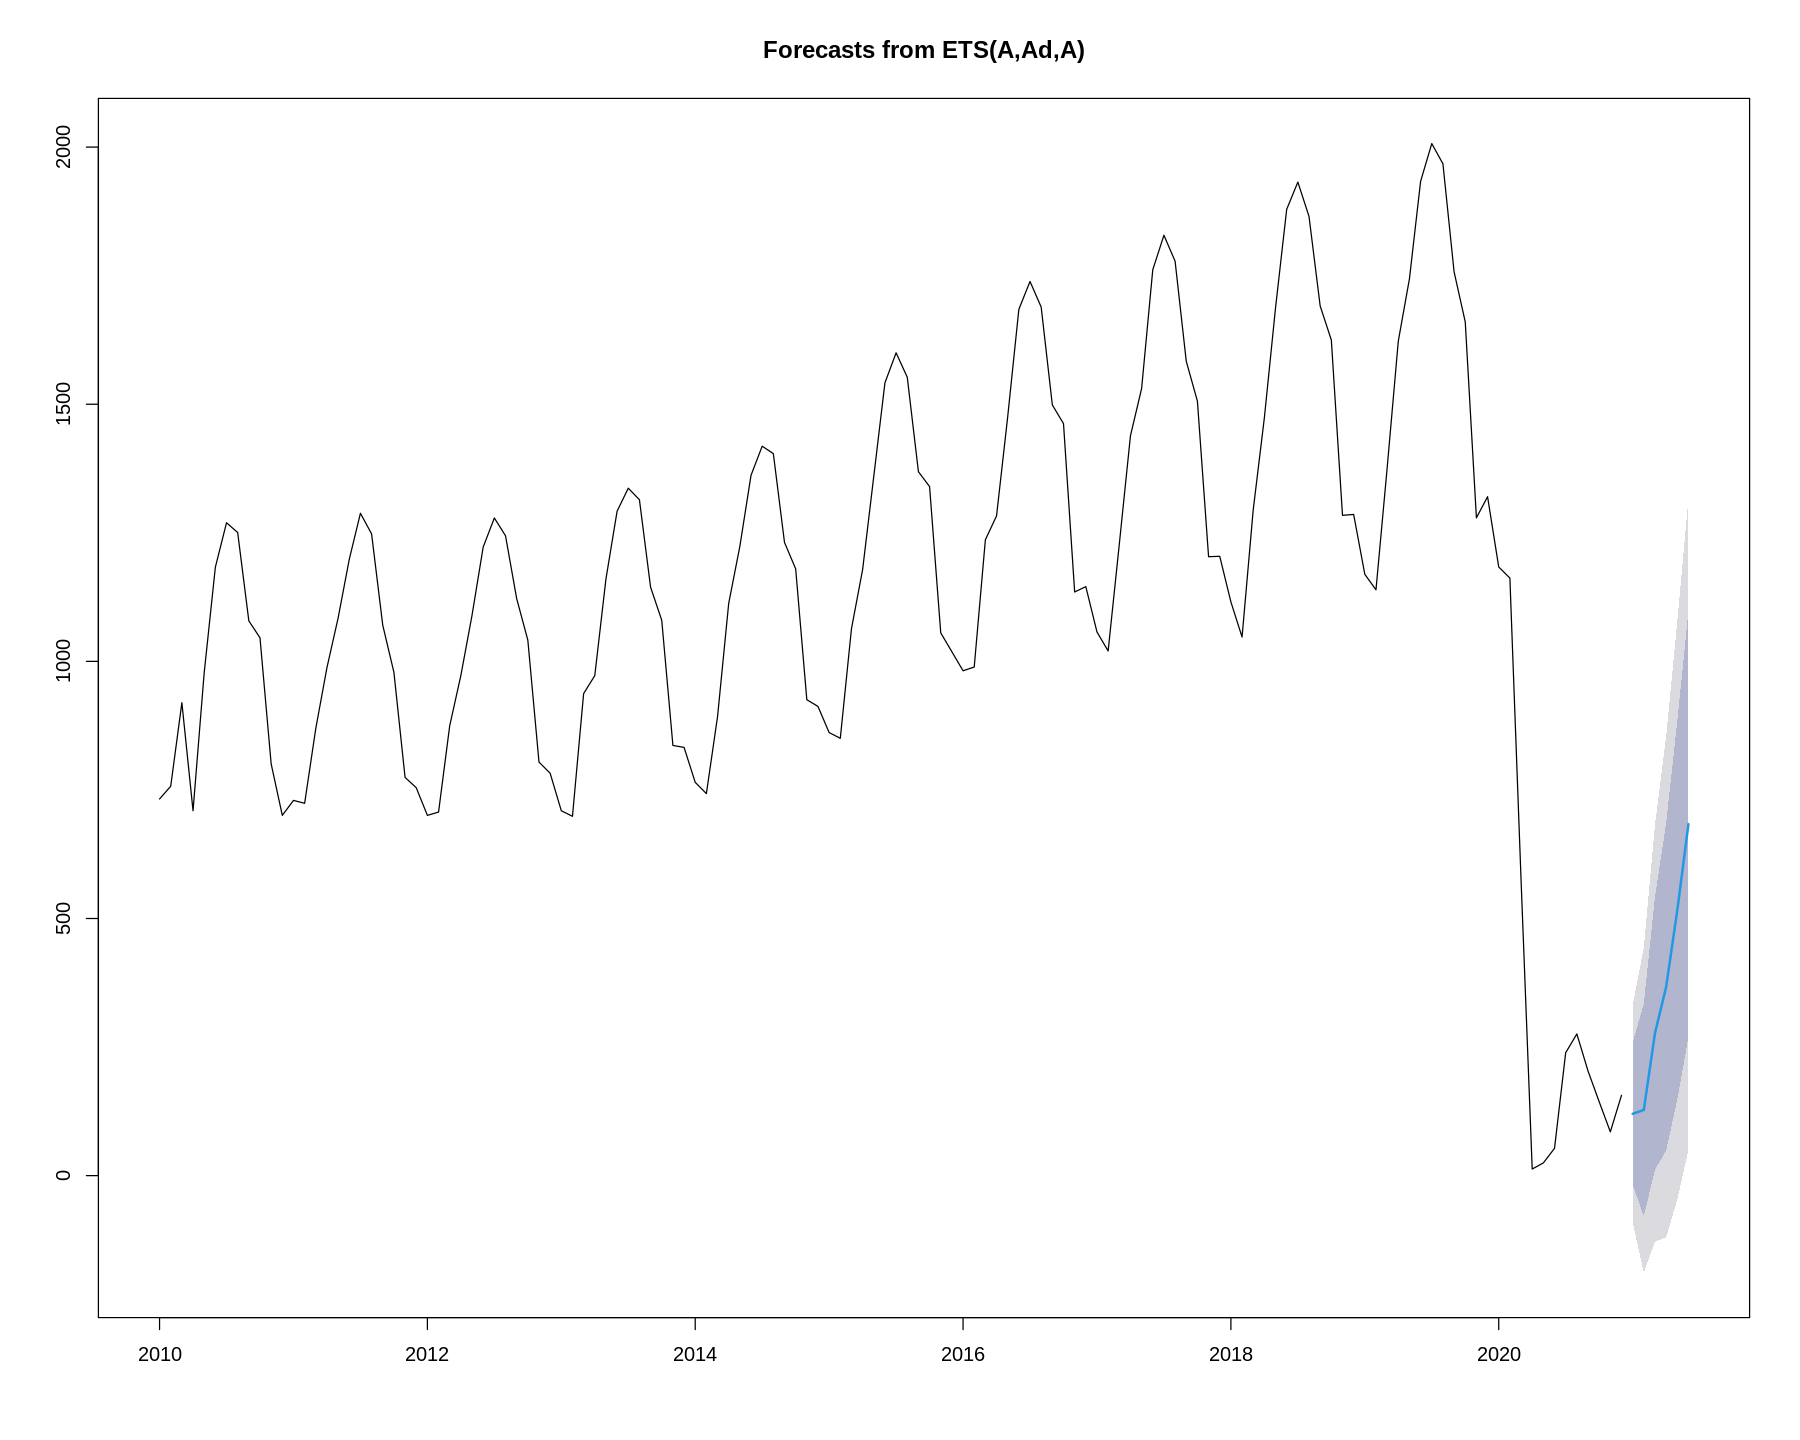

In [104]:
plot(forecast(departs_fit1,h=6)) #mean around 1500, with damping in the model

In [105]:
forecast(departs_fit3,h=6) #

         Point Forecast      Lo 80    Hi 80      Lo 95     Hi 95
Jan 2021       86.09848  -56.61566 228.8126 -132.16396  304.3609
Feb 2021       66.99705 -136.20984 270.2039 -243.78107  377.7752
Mar 2021      192.64903  -57.92808 443.2261 -190.57558  575.8736
Apr 2021      262.04848  -29.26326 553.3602 -183.47437  707.5713
May 2021      391.47076   63.56586 719.3757 -110.01652  892.9580
Jun 2021      542.36809  180.74141 903.9948  -10.69219 1095.4284

In [106]:
ts_departs_test-forecast(departs_fit3,h=6)$mean

,Jan,Feb,Mar,Apr,May,Jun
2021,18.00152,-20.29705,-135.14903,-200.54848,-309.07076,-367.66809


In [109]:
mean(ts_departs_test-forecast(departs_fit3,h=6)$mean) 

[1] -169.122

In [111]:
sd(forecast(departs_fit3,h=6)$mean)

[1] 183.8436

In [113]:
accuracy(departs_fit3,h=6) 

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-9.089778,104.3934,53.82661,-40.31534,50.4259,0.2790401,0.375125


# SARIMA analysis

- Plot the data
- Take first differences of the data until it is stationary
- Transform the data if necessary to stabilise the variance
- Examine the ACF/PACF plots to identify possible models.
- Fit the models
- Use the AICc statistic to search for the best models 
- Check residuals by plotting their ACF and do a Box Ljung test
- Once residuals look like white noise, calculate the forecast values

## Plot data

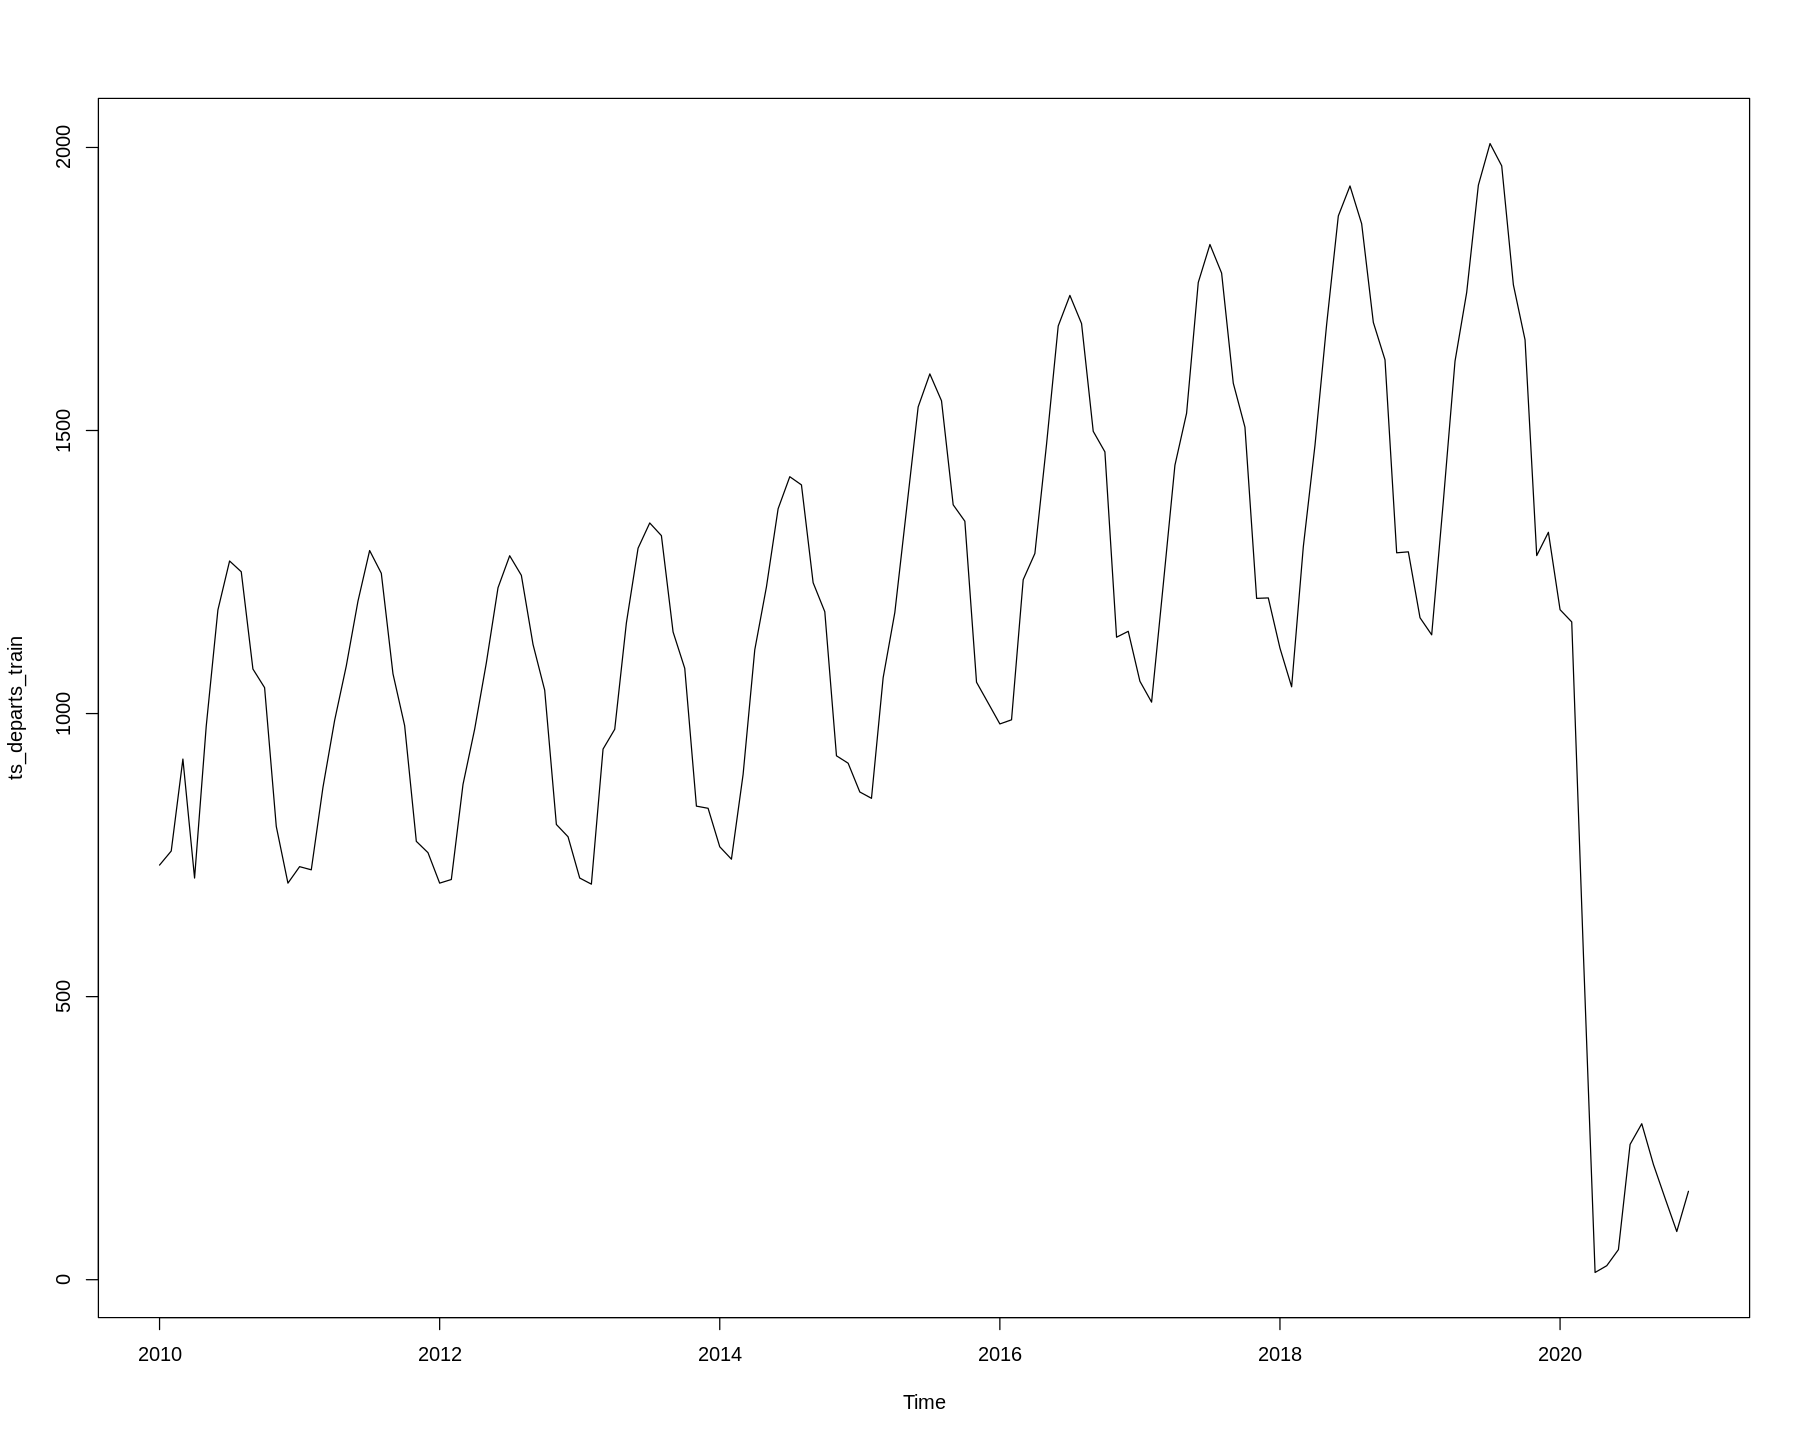

In [116]:
# Plot the time series and its decomposition
plot(ts_departs_train)

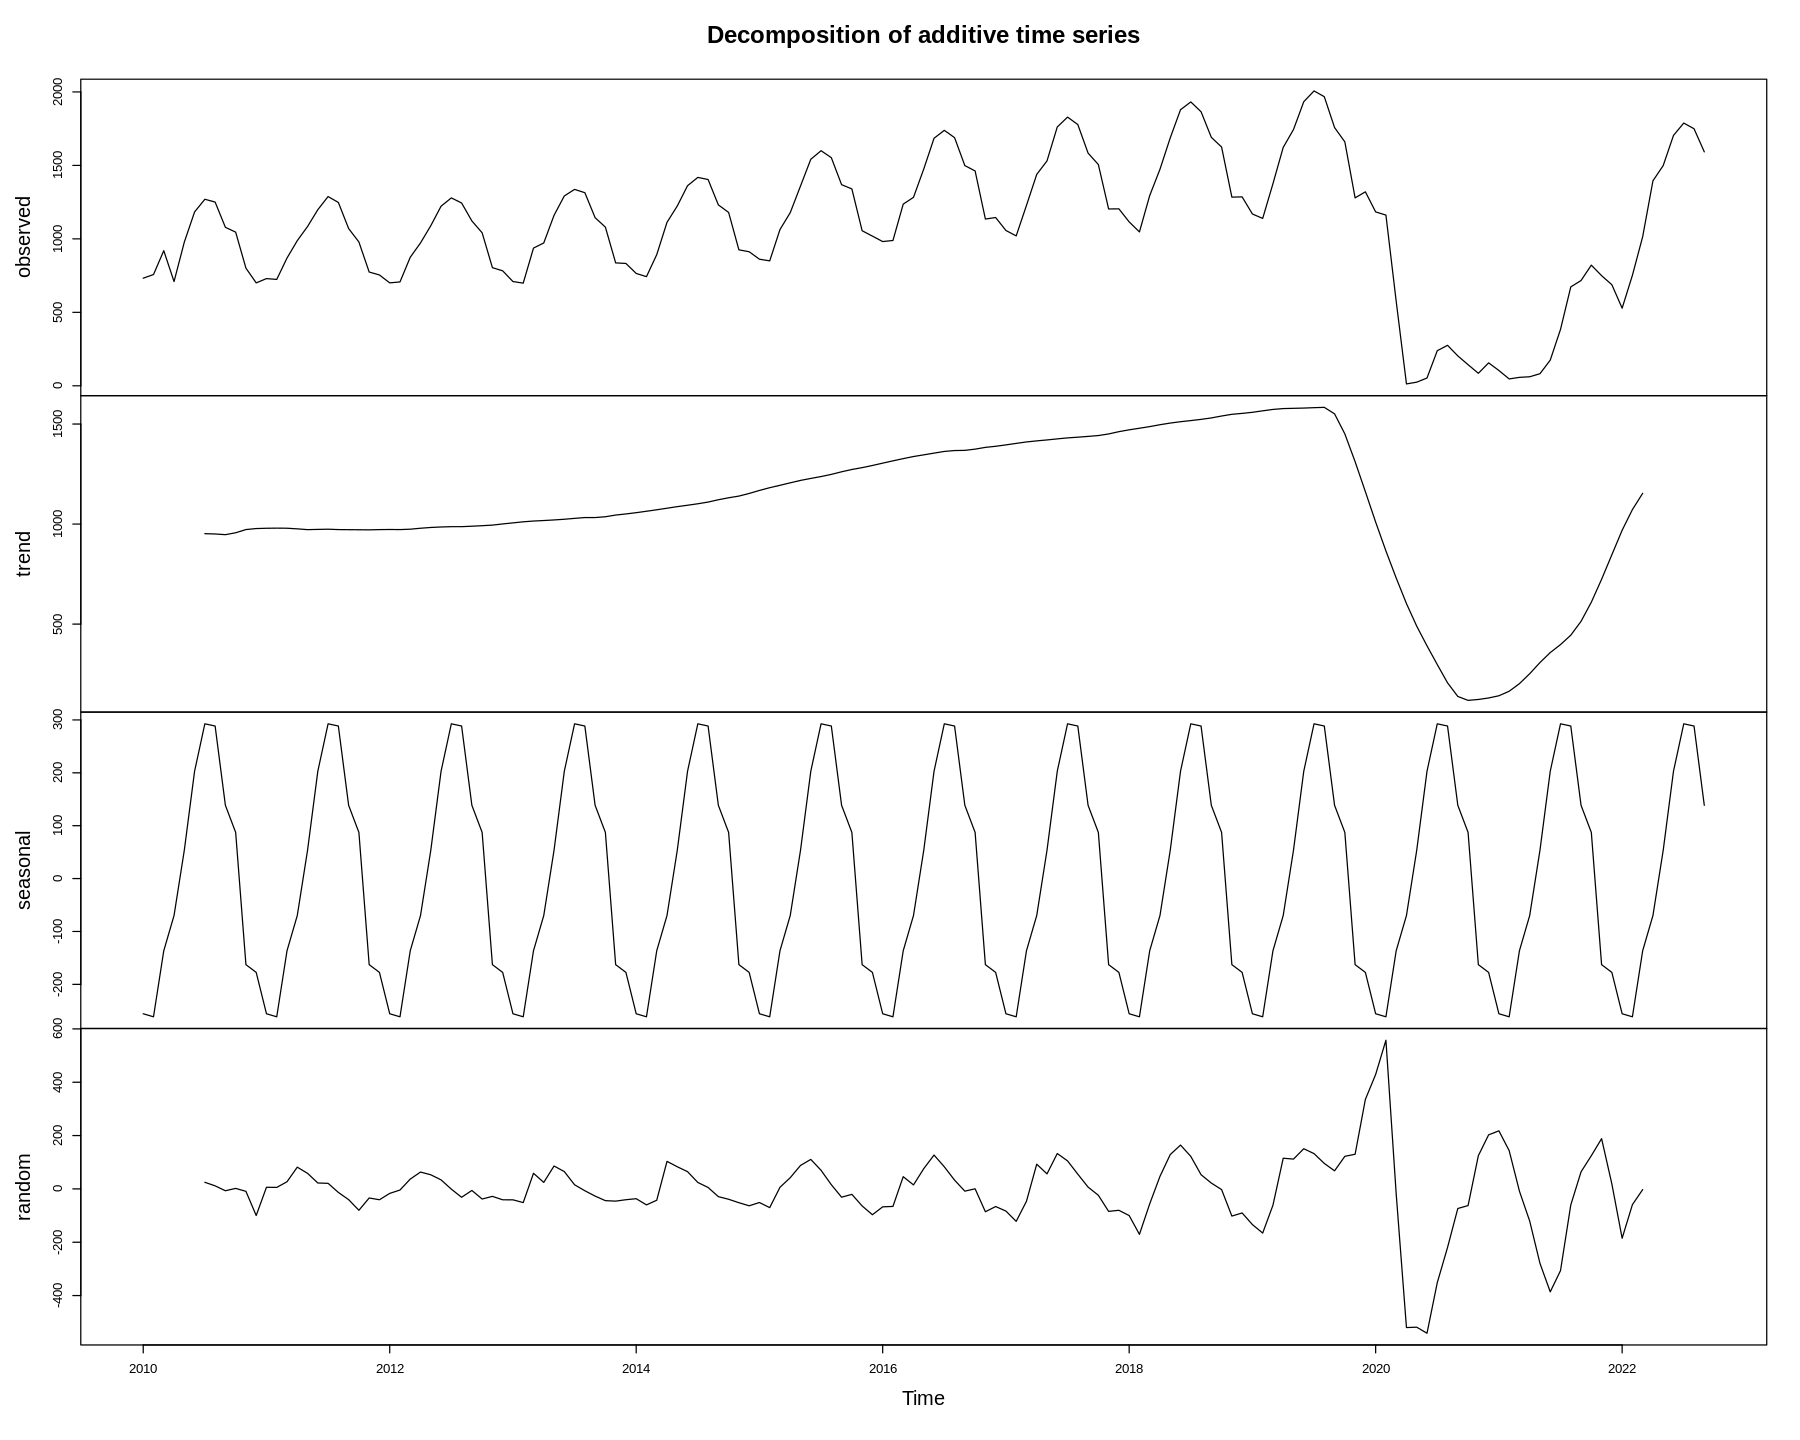

In [118]:
plot(decompose(ts_departs))
# Seasonality with annual lag is obvious

## Estimate the orders of integration

In [122]:
# Whole time series
ndiffs(ts_departs)
# d = 0 

# Training data order of integration
ndiffs(ts_departs_train)
# d = 1

nsdiffs(ts_departs_train)
# d =  1 for seasonal terms

[1] 0

[1] 1

[1] 1

In [130]:
#So, take first differences
diff_ts_departs_train<-diff(ts_departs_train)

In [125]:
# Test this first differences series for stationarity with Augmented Dickey Fuller 
# We accept the alternative hypothesis of stationarity in the first diff series

adf.test(diff_ts_departs_train)

Warning message in adf.test(diff_ts_departs_train):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff_ts_departs_train
Dickey-Fuller = -7.2297, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


Graph the full time series  
Plot one on top of the other using patchwork for ggplot2 graphs

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


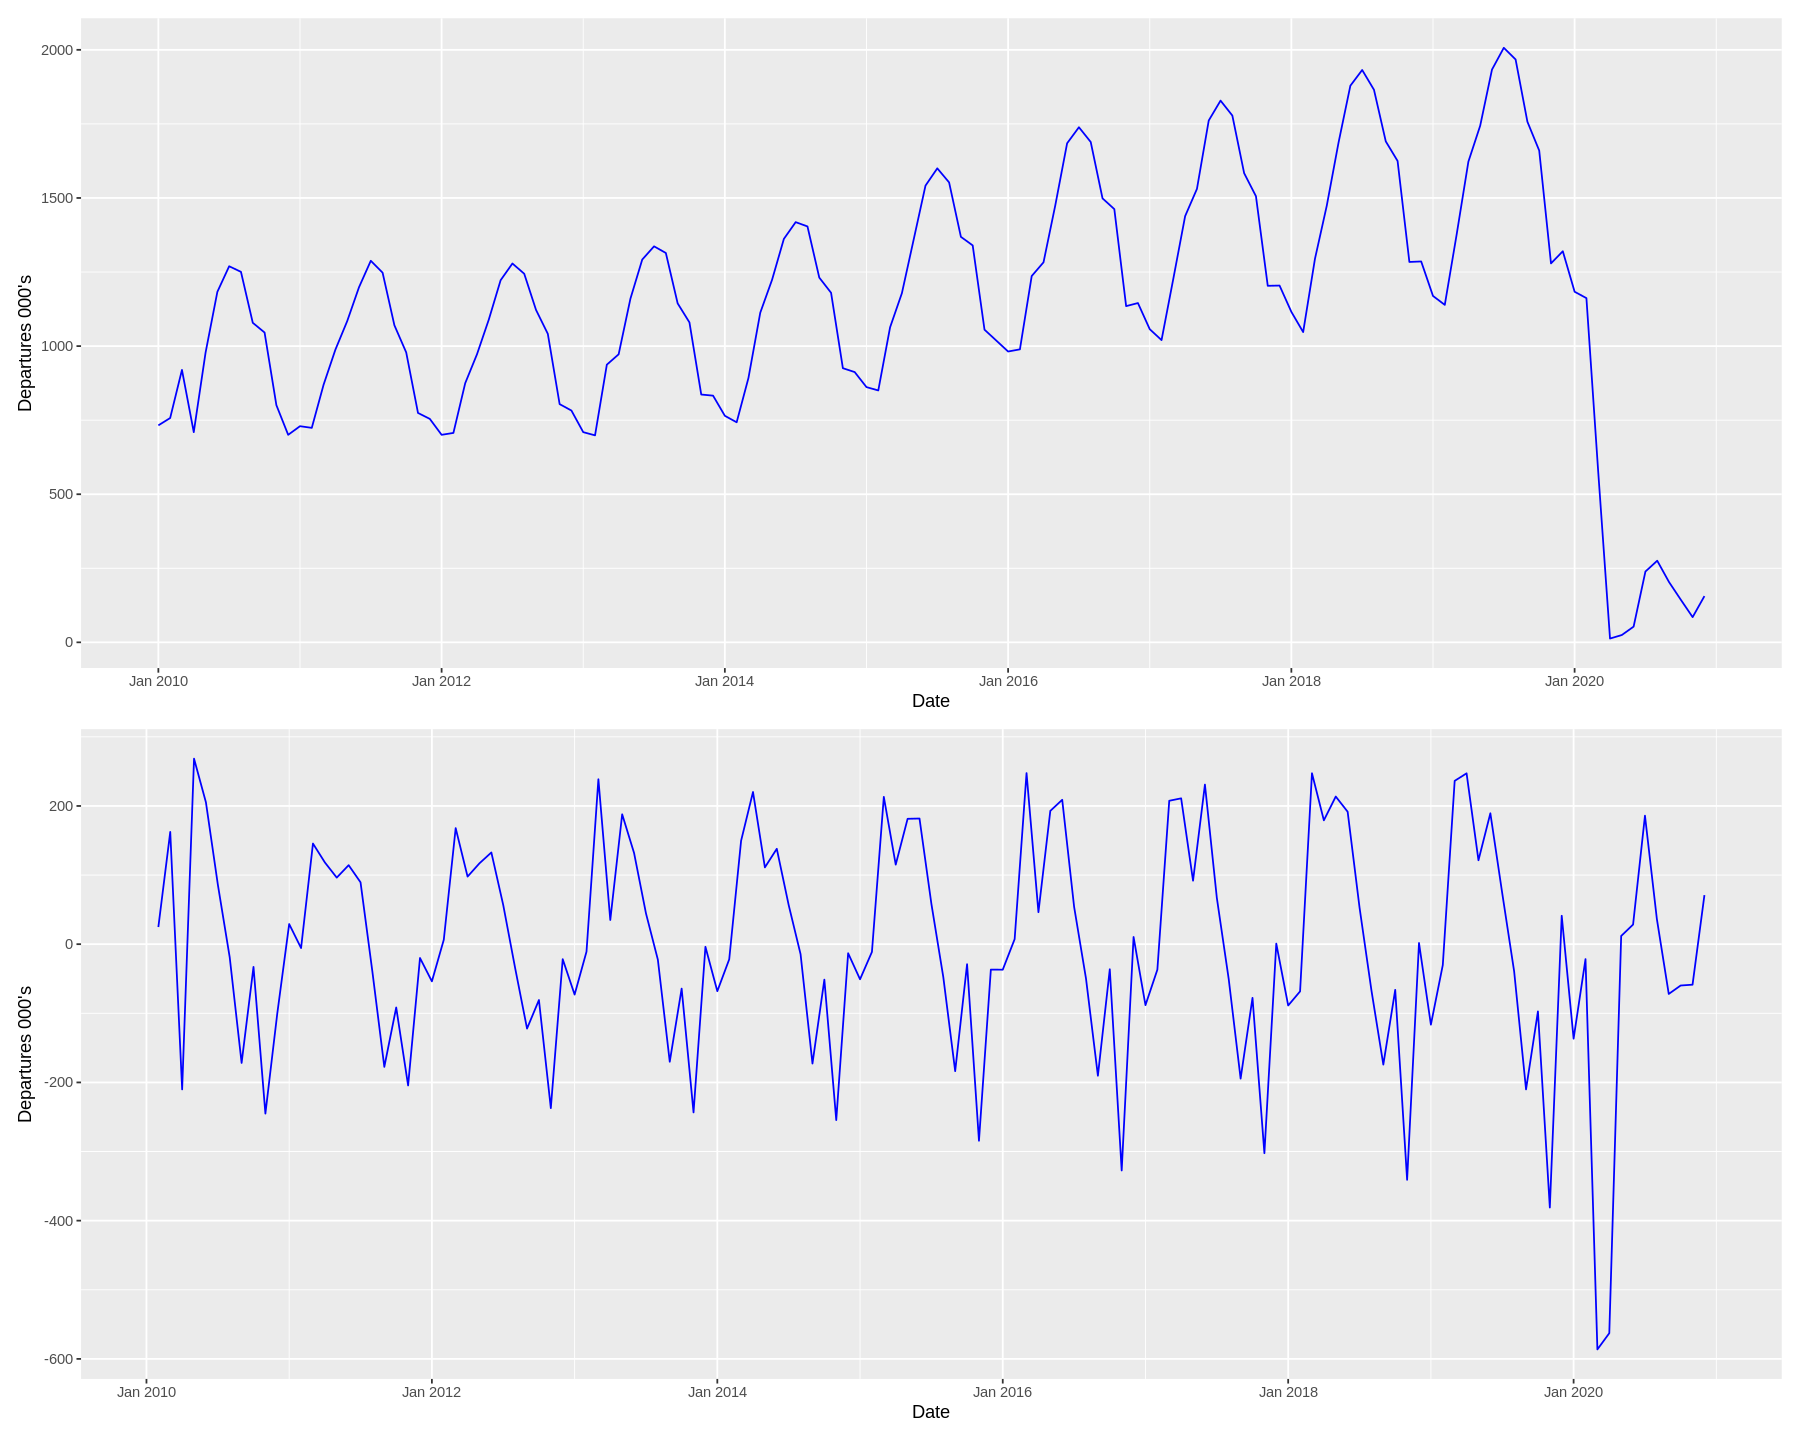

In [131]:
p1<-ggplot(ts_departs_train, aes(x=as.yearmon(index(ts_departs_train)),y = ts_departs_train))+
  geom_line(colour='blue')+
  ylab("Departures 000's") + xlab('Date')

p2<-ggplot(diff_ts_departs_train, aes(x=as.yearmon(index(diff_ts_departs_train)),
                                  y = diff_ts_departs_train))+
  geom_line(colour='blue')+
  ylab("Departures 000's") + xlab('Date')

p1 / p2 # Graph ts_departs_train dataset and its first differences, one on top of the other

In [134]:
# KPSS, ADF and PP tests show that the first differences series has integration order zero
print("Order of original KPSS")
ndiffs(ts_departs_train,test='kpss') #1 
print("Order of first differences KPSS")
ndiffs(diff_ts_departs_train,test='kpss') #0

print("Order of original ADF")
ndiffs(ts_departs_train,test='adf') #0
print("Order of first differences ADF")
ndiffs(diff_ts_departs_train,test='adf') #0

print("Order of original PP")
ndiffs(ts_departs_train,test='pp') #1
print("Order of first differences PP")
ndiffs(diff_ts_departs_train,test='pp') #0

[1] "Order of original KPSS"


[1] 1

[1] "Order of first differences KPSS"


[1] 0

[1] "Order of original ADF"


[1] 0

[1] "Order of first differences ADF"


[1] 0

[1] "Order of original PP"


[1] 1

[1] "Order of first differences PP"


[1] 0


Graph the Autocorrelation and Partial Autocorrelation Functions (PACF)

## Autocorrelation and Partial Autocorrelation Functions Graphs

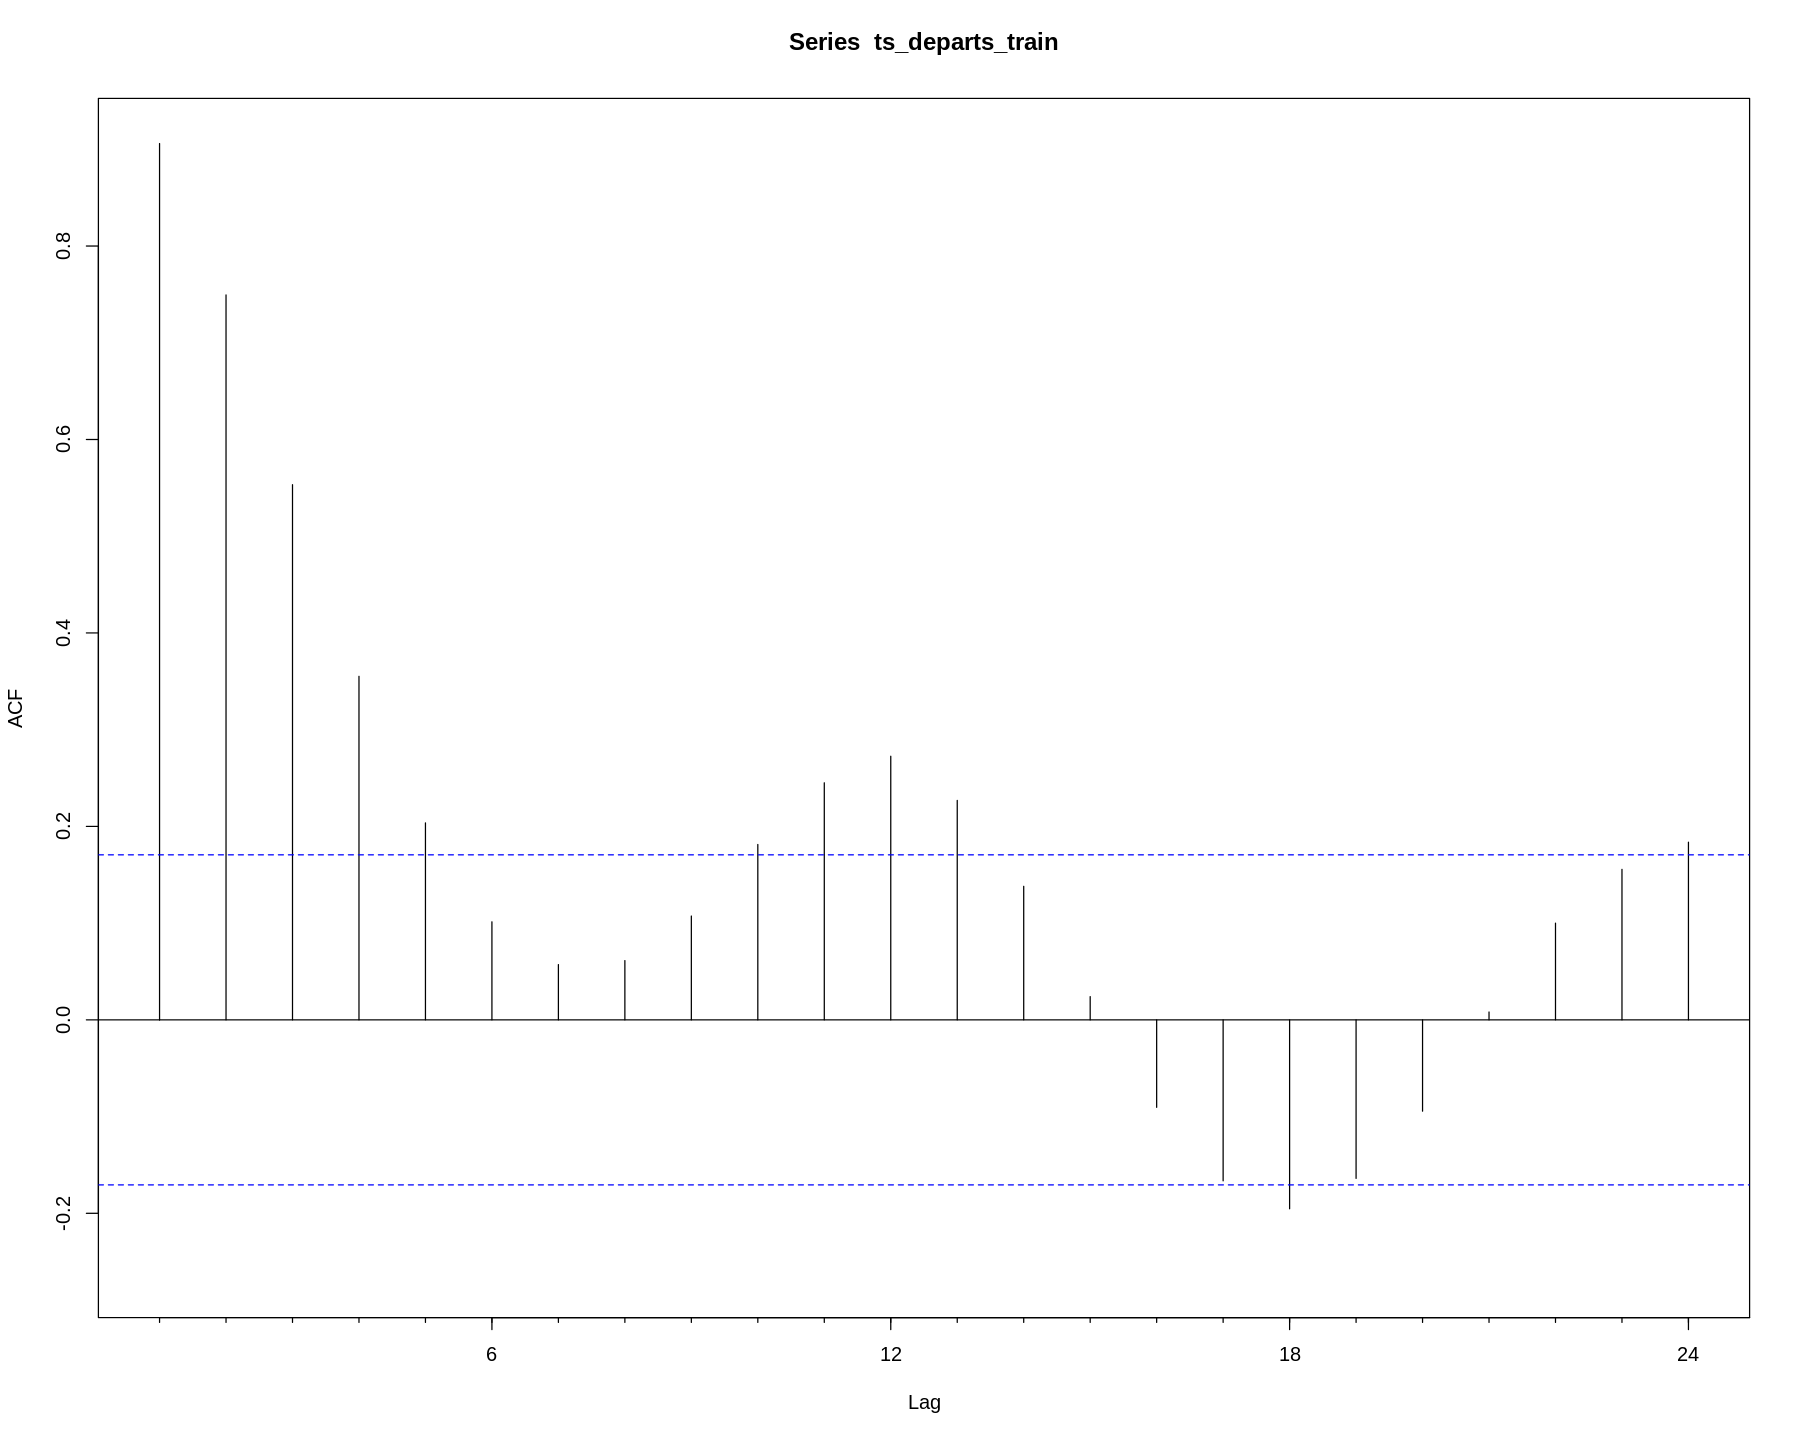

In [136]:
Acf(ts_departs_train)
# Acf shows significant positive correlation on lags 1 to 5 in the training data set 
# and slow decline, then significant around lag 12, indicating seasonality

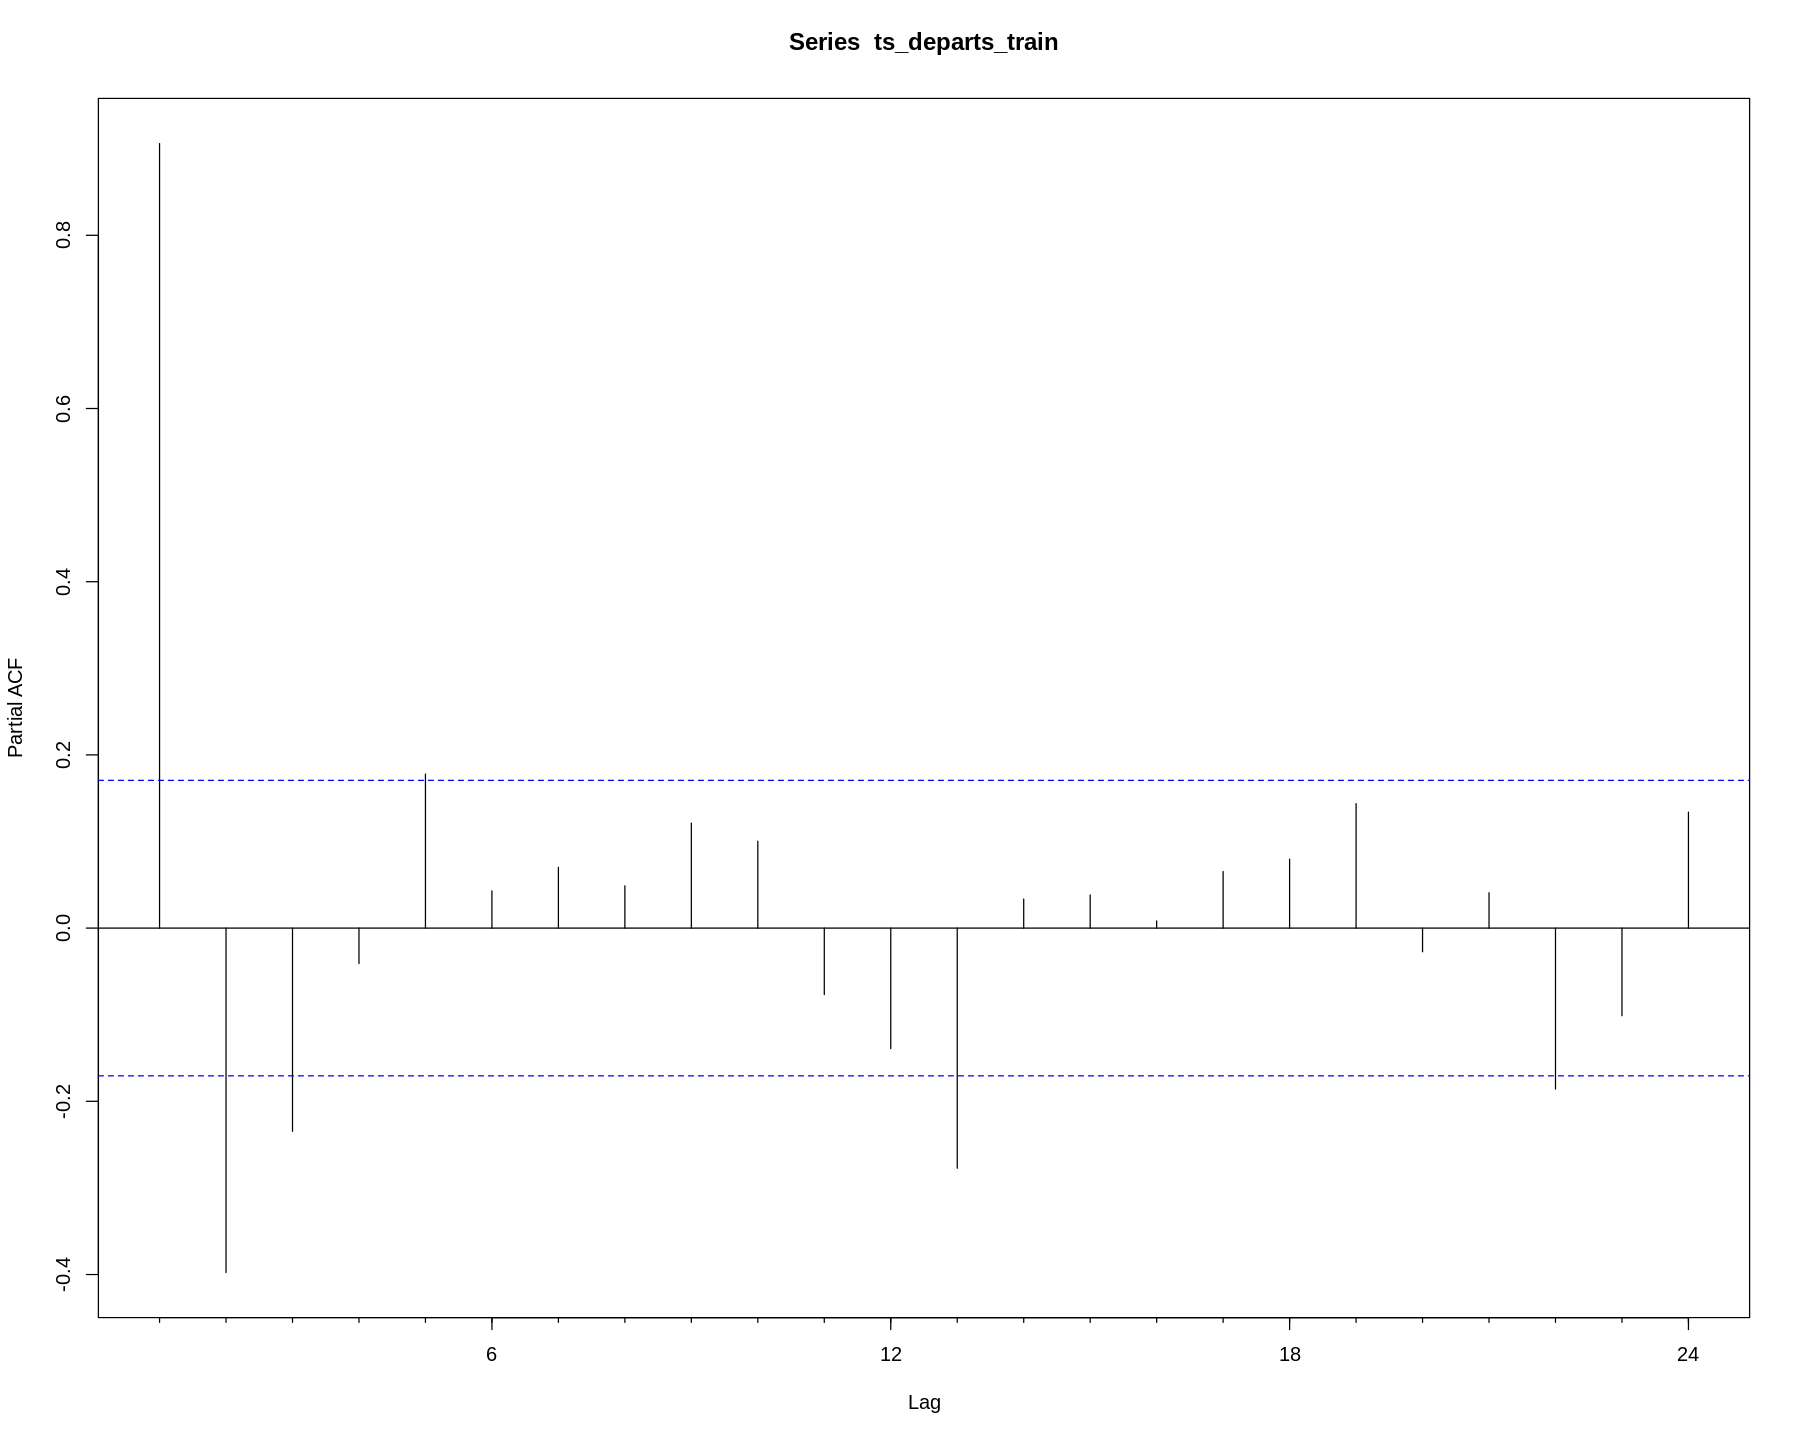

In [137]:
Pacf(ts_departs_train)
# Pacf shows spikes at 1 and at 2 also, supporting view that there is AR
# Pacf reverses, so possibly some MA effects also, but not strongly indicated in graph

## Model Estimation

In [138]:
# Run auto.arima to devise a model
# stepwise = FALSE to do a comprehensive slow search
sax<-auto.arima(ts_departs_train,seasonal=TRUE,stepwise=FALSE,
                ic='aicc',start.p=1,start.q=1)

In [139]:
summary(sax)

Series: ts_departs_train 
ARIMA(1,1,0)(0,1,1)[12] 

Coefficients:
         ar1     sma1
      0.3966  -0.8274
s.e.  0.0837   0.2045

sigma^2 = 11307:  log likelihood = -730.08
AIC=1466.16   AICc=1466.37   BIC=1474.5

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE     MASE
Training set -4.243692 100.1111 50.25274 -18.05206 35.48415 0.260513
                     ACF1
Training set -0.002229619

In [144]:
sa1<-auto.arima(ts_departs_train,seasonal=TRUE)
summary(sa1)
# Same model and scores as the automated SAX model

Series: ts_departs_train 
ARIMA(1,1,0)(0,1,1)[12] 

Coefficients:
         ar1     sma1
      0.3966  -0.8274
s.e.  0.0837   0.2045

sigma^2 = 11307:  log likelihood = -730.08
AIC=1466.16   AICc=1466.37   BIC=1474.5

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE     MASE
Training set -4.243692 100.1111 50.25274 -18.05206 35.48415 0.260513
                     ACF1
Training set -0.002229619

In [143]:
sa2 <-Arima(ts_departs_train,order=c(2,0,0),seasonal=c(2,1,0))
summary(sa2)
# Somewhat worse scores

Series: ts_departs_train 
ARIMA(2,0,0)(2,1,0)[12] 

Coefficients:
         ar1      ar2     sar1     sar2
      1.3955  -0.4378  -0.7137  -0.3686
s.e.  0.0815   0.0835   0.1784   0.1398

sigma^2 = 11800:  log likelihood = -735.81
AIC=1481.63   AICc=1482.15   BIC=1495.57

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set -3.897045 101.8324 48.66522 -24.19493 40.92621 0.2522832
                    ACF1
Training set 0.004571465

In [145]:
sa3 <-Arima(ts_departs,order=c(1,0,0),seasonal=c(0,1,1))
summary(sa3)
# Much worse scores than our first SAX autofitted model

Series: ts_departs 
ARIMA(1,0,0)(0,1,1)[12] 

Coefficients:
         ar1     sma1
      0.9721  -0.9996
s.e.  0.0234   0.1672

sigma^2 = 12973:  log likelihood = -882.34
AIC=1770.68   AICc=1770.86   BIC=1779.53

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE     ACF1
Training set 4.057219 108.5619 55.19253 -41.79875 51.40003 0.2008773 0.428797

In [146]:
sa4 <-Arima(ts_departs,order=c(1,1,0),seasonal=c(0,1,1))
summary(sa4)
# much worse than SAX

Series: ts_departs 
ARIMA(1,1,0)(0,1,1)[12] 

Coefficients:
         ar1     sma1
      0.4260  -0.8593
s.e.  0.0768   0.1099

sigma^2 = 12060:  log likelihood = -863.49
AIC=1732.98   AICc=1733.15   BIC=1741.8

Training set error measures:
                   ME     RMSE      MAE      MPE     MAPE      MASE
Training set 1.221393 104.2938 57.31768 -14.7904 33.26507 0.2086119
                     ACF1
Training set -0.002643279

In [147]:
sa5 <-Arima(ts_departs,order=c(1,1,0),seasonal=c(1,0,0))
summary(sa5)
# RSME = 120.714
# AIC=1899.88   AICc=1900.04   BIC=1908.95
# Much, much worse than SAX 

Series: ts_departs 
ARIMA(1,1,0)(1,0,0)[12] 

Coefficients:
         ar1    sar1
      0.4192  0.5397
s.e.  0.0738  0.0708

sigma^2 = 14863:  log likelihood = -946.94
AIC=1899.88   AICc=1900.04   BIC=1908.95

Training set error measures:
                   ME    RMSE     MAE       MPE     MAPE      MASE        ACF1
Training set 2.766797 120.714 82.6071 -9.103386 43.77693 0.3006546 -0.01656061

## Diagnosis

In [151]:
# Plot the residuals from the automatically derived model, sax
residuals(sax)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,0.42285120,0.20831442,0.27362615,0.01865749,0.25765956,0.40313990,0.42565879,0.35437634,0.15236199,0.10578947,-0.13804959,-0.83734533
2011,-3.21735878,-21.49338296,-3.65836233,258.15457607,-232.95151487,-17.46181795,30.14162250,-17.32753444,1.98132216,-43.73882036,48.68417198,48.00387637
2012,-92.97236370,21.56288105,13.45252970,119.60478302,-105.84931356,-0.83219977,-18.64882282,6.75758872,48.15189421,-34.54938536,-5.37721249,36.94153936
2013,-68.72851006,3.41770749,81.50559269,-3.08785271,17.11245605,-27.54678420,-23.53950909,20.39377222,-16.43031392,9.53733982,-15.62714259,44.04040368
2014,-49.27408873,-10.56422019,-20.68819835,208.99529339,-131.33450242,14.65803942,-8.23216140,18.09314023,-17.65624387,20.48249691,-27.18865431,27.74857245
2015,-16.70225343,-4.42596019,41.60732059,34.52346687,7.63272009,26.80509367,-21.60344541,-18.81065239,-11.59527349,41.75040146,-58.69741075,9.85534424
2016,9.72905387,9.29340957,59.49873653,-53.68166082,44.13944471,43.34573448,-31.77263129,-15.50218144,-14.75829955,28.42887628,-85.82067622,70.94559664
2017,-61.05701368,-16.28635997,25.58494990,135.32377761,-128.90976962,96.14348204,-21.29671452,-18.23998544,-15.73360404,-16.43936452,-28.01963570,37.65774264
2018,-45.88058228,-44.22344051,72.59449143,62.56533374,28.68018771,-8.88210323,-15.80224808,-25.42100530,13.78694957,-9.82183563,-65.50902340,46.53840968
2019,-65.18270917,12.63497450,33.29914198,123.05725748,-95.11546421,26.92965087,8.35660269,-1.58788759,-35.26069644,-24.89203232,-81.06555697,92.99908979



	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(0,1,1)[12]
Q* = 5.235, df = 22, p-value = 0.9999

Model df: 2.   Total lags used: 24



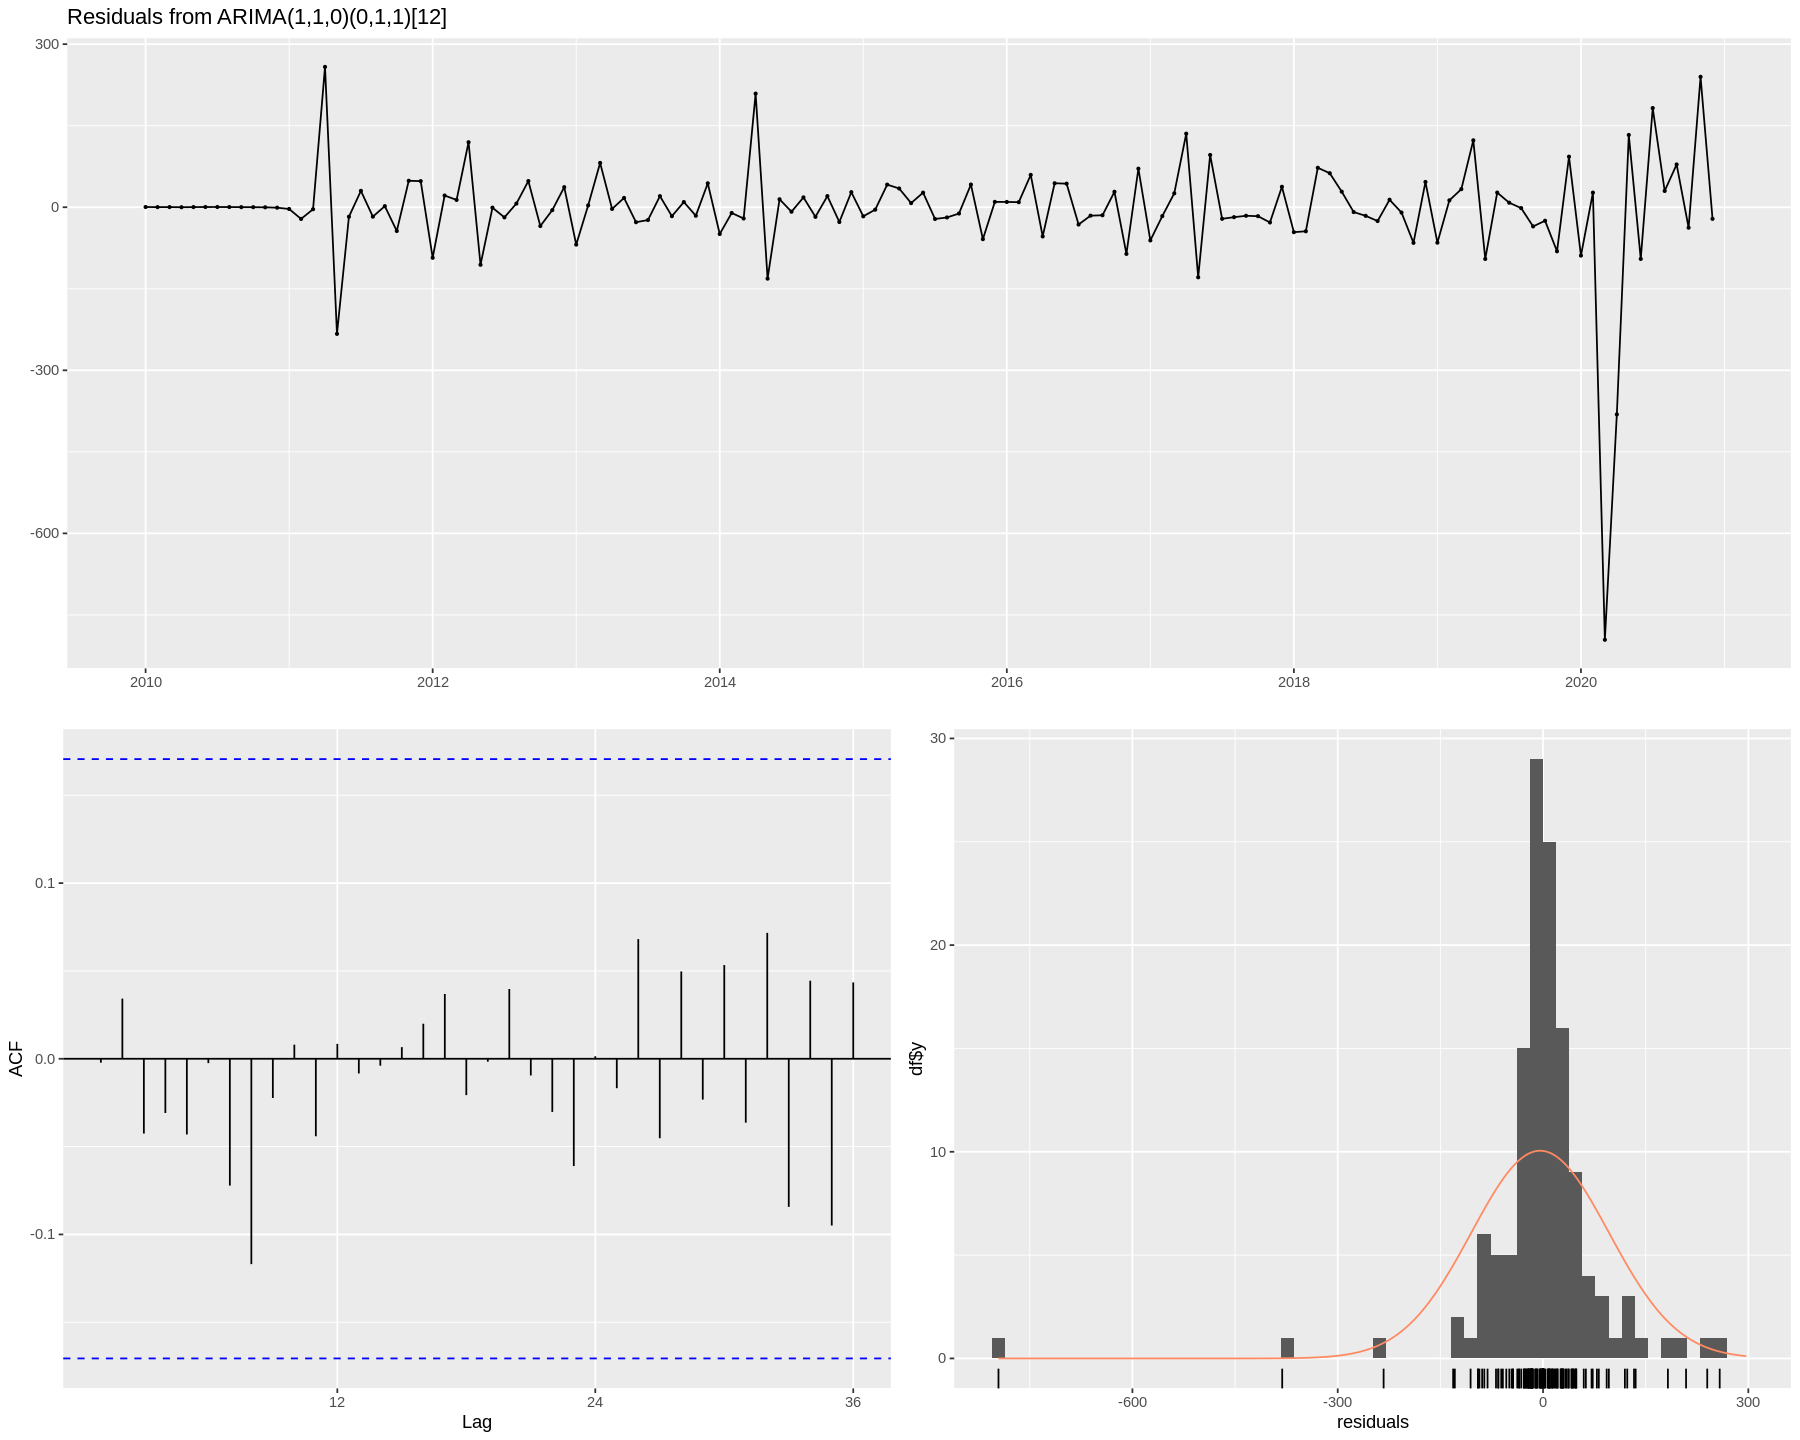

In [155]:
checkresiduals(sax,plot=TRUE)
# Box tests, high prob so we can  uphold the null hypothesis of independence
# Result is that null hypothesis of independence is upheld
# Residuals from model 'sax' ARIMA(2,0,0)(0,1,1)[12]Ljung-Box test
# AR, MA unlikely, nothing is significant in ACF 

In [156]:
Box.test(x = residuals(sax),type='Ljung-Box')
# data:  residuals(sax)
# X-squared = 0.00067123, df = 1, p-value = 0.9793


	Box-Ljung test

data:  residuals(sax)
X-squared = 0.00067123, df = 1, p-value = 0.9793


In [157]:
# Box tests, all uphold the null hypothesis of independence 
Box.test(x = residuals(sax),type='Ljung-Box') # 0.9793
Box.test(x = residuals(sax),type='Ljung-Box',lag=1) # p = 0.9793
Box.test(x = residuals(sax),type='Ljung-Box',lag=2) # p = 0.9229
Box.test(x = residuals(sax),type='Ljung-Box',lag=3) # p = 0.9384
Box.test(x = residuals(sax),type='Ljung-Box',lag=4) # p = 0.9695
Box.test(x = residuals(sax),type='Ljung-Box',lag=5) # p = 0.9771
Box.test(x = residuals(sax),type='Ljung-Box',lag=6) # p = 0.9921
Box.test(x = residuals(sax),type='Ljung-Box',lag=7) # p = 0.981
Box.test(x = residuals(sax),type='Ljung-Box',lag=8) # p = 0.9002
Box.test(x = residuals(sax),type='Ljung-Box',lag=9) # p = 0.938
Box.test(x = residuals(sax),type='Ljung-Box',lag=10)# p = 0.9647
Box.test(x = residuals(sax),type='Ljung-Box',lag=11)# p = 0.974
Box.test(x = residuals(sax),type='Ljung-Box',lag=12)# p = 0.9858
Box.test(x = residuals(sax),type='Ljung-Box',lag=13)# p = 0.9925
Box.test(x = residuals(sax),type='Ljung-Box',lag=14)# p = 0.9962


	Box-Ljung test

data:  residuals(sax)
X-squared = 0.00067123, df = 1, p-value = 0.9793



	Box-Ljung test

data:  residuals(sax)
X-squared = 0.00067123, df = 1, p-value = 0.9793



	Box-Ljung test

data:  residuals(sax)
X-squared = 0.16039, df = 2, p-value = 0.9229



	Box-Ljung test

data:  residuals(sax)
X-squared = 0.40878, df = 3, p-value = 0.9384



	Box-Ljung test

data:  residuals(sax)
X-squared = 0.54038, df = 4, p-value = 0.9695



	Box-Ljung test

data:  residuals(sax)
X-squared = 0.79917, df = 5, p-value = 0.9771



	Box-Ljung test

data:  residuals(sax)
X-squared = 0.80004, df = 6, p-value = 0.9921



	Box-Ljung test

data:  residuals(sax)
X-squared = 1.5373, df = 7, p-value = 0.981



	Box-Ljung test

data:  residuals(sax)
X-squared = 3.4872, df = 8, p-value = 0.9002



	Box-Ljung test

data:  residuals(sax)
X-squared = 3.5588, df = 9, p-value = 0.938



	Box-Ljung test

data:  residuals(sax)
X-squared = 3.5682, df = 10, p-value = 0.9647



	Box-Ljung test

data:  residuals(sax)
X-squared = 3.8525, df = 11, p-value = 0.974



	Box-Ljung test

data:  residuals(sax)
X-squared = 3.8631, df = 12, p-value = 0.9858



	Box-Ljung test

data:  residuals(sax)
X-squared = 3.8734, df = 13, p-value = 0.9925



	Box-Ljung test

data:  residuals(sax)
X-squared = 3.8758, df = 14, p-value = 0.9962


## Forecasts


In [169]:
ts_departs_test
#       Jan   Feb   Mar   Apr   May   Jun
# 2021 104.1  46.7  57.5  61.5  82.4 174.7


,Jan,Feb,Mar,Apr,May,Jun
2021,104.1,46.7,57.5,61.5,82.4,174.7


In [160]:
mean(ts_departs_test) # 87.81

[1] 87.81667

In [161]:
sd(ts_departs_test) # 47.21

[1] 47.21324

In [162]:
forecast(sax,h=6)
# show the values
# Negative values aren't valid 
#

         Point Forecast      Lo 80    Hi 80     Lo 95     Hi 95
Jan 2021      104.45104  -32.29757 241.1997 -104.6879  313.5900
Feb 2021       94.42009 -140.31918 329.1594 -264.5826  453.4228
Mar 2021      168.66271 -147.82498 485.1504 -315.3634  652.6889
Apr 2021      181.99923 -203.89678 567.8952 -408.1778  772.1763
May 2021      312.76676 -133.51817 759.0517 -369.7671  995.3007
Jun 2021      466.67692  -33.35025 966.7041 -298.0486 1231.4025

In [166]:
# Forecast errors 
ts_departs_test - forecast(sax,h=6)$mean

,Jan,Feb,Mar,Apr,May,Jun
2021,-0.3510388,-47.7200860,-111.1627118,-120.4992348,-230.3667594,-291.9769162


In [167]:
# Mean forecast error
mean(ts_departs_test - forecast(sax,h=6)$mean) # =-133.6794

[1] -133.6795

In [165]:
# SD of forecast
sd(forecast(sax,h=6)$mean) # 143.2782

[1] 143.2782

In [168]:
accuracy(sax,h=6)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-4.243692,100.1111,50.25274,-18.05206,35.48415,0.260513,-0.002229619


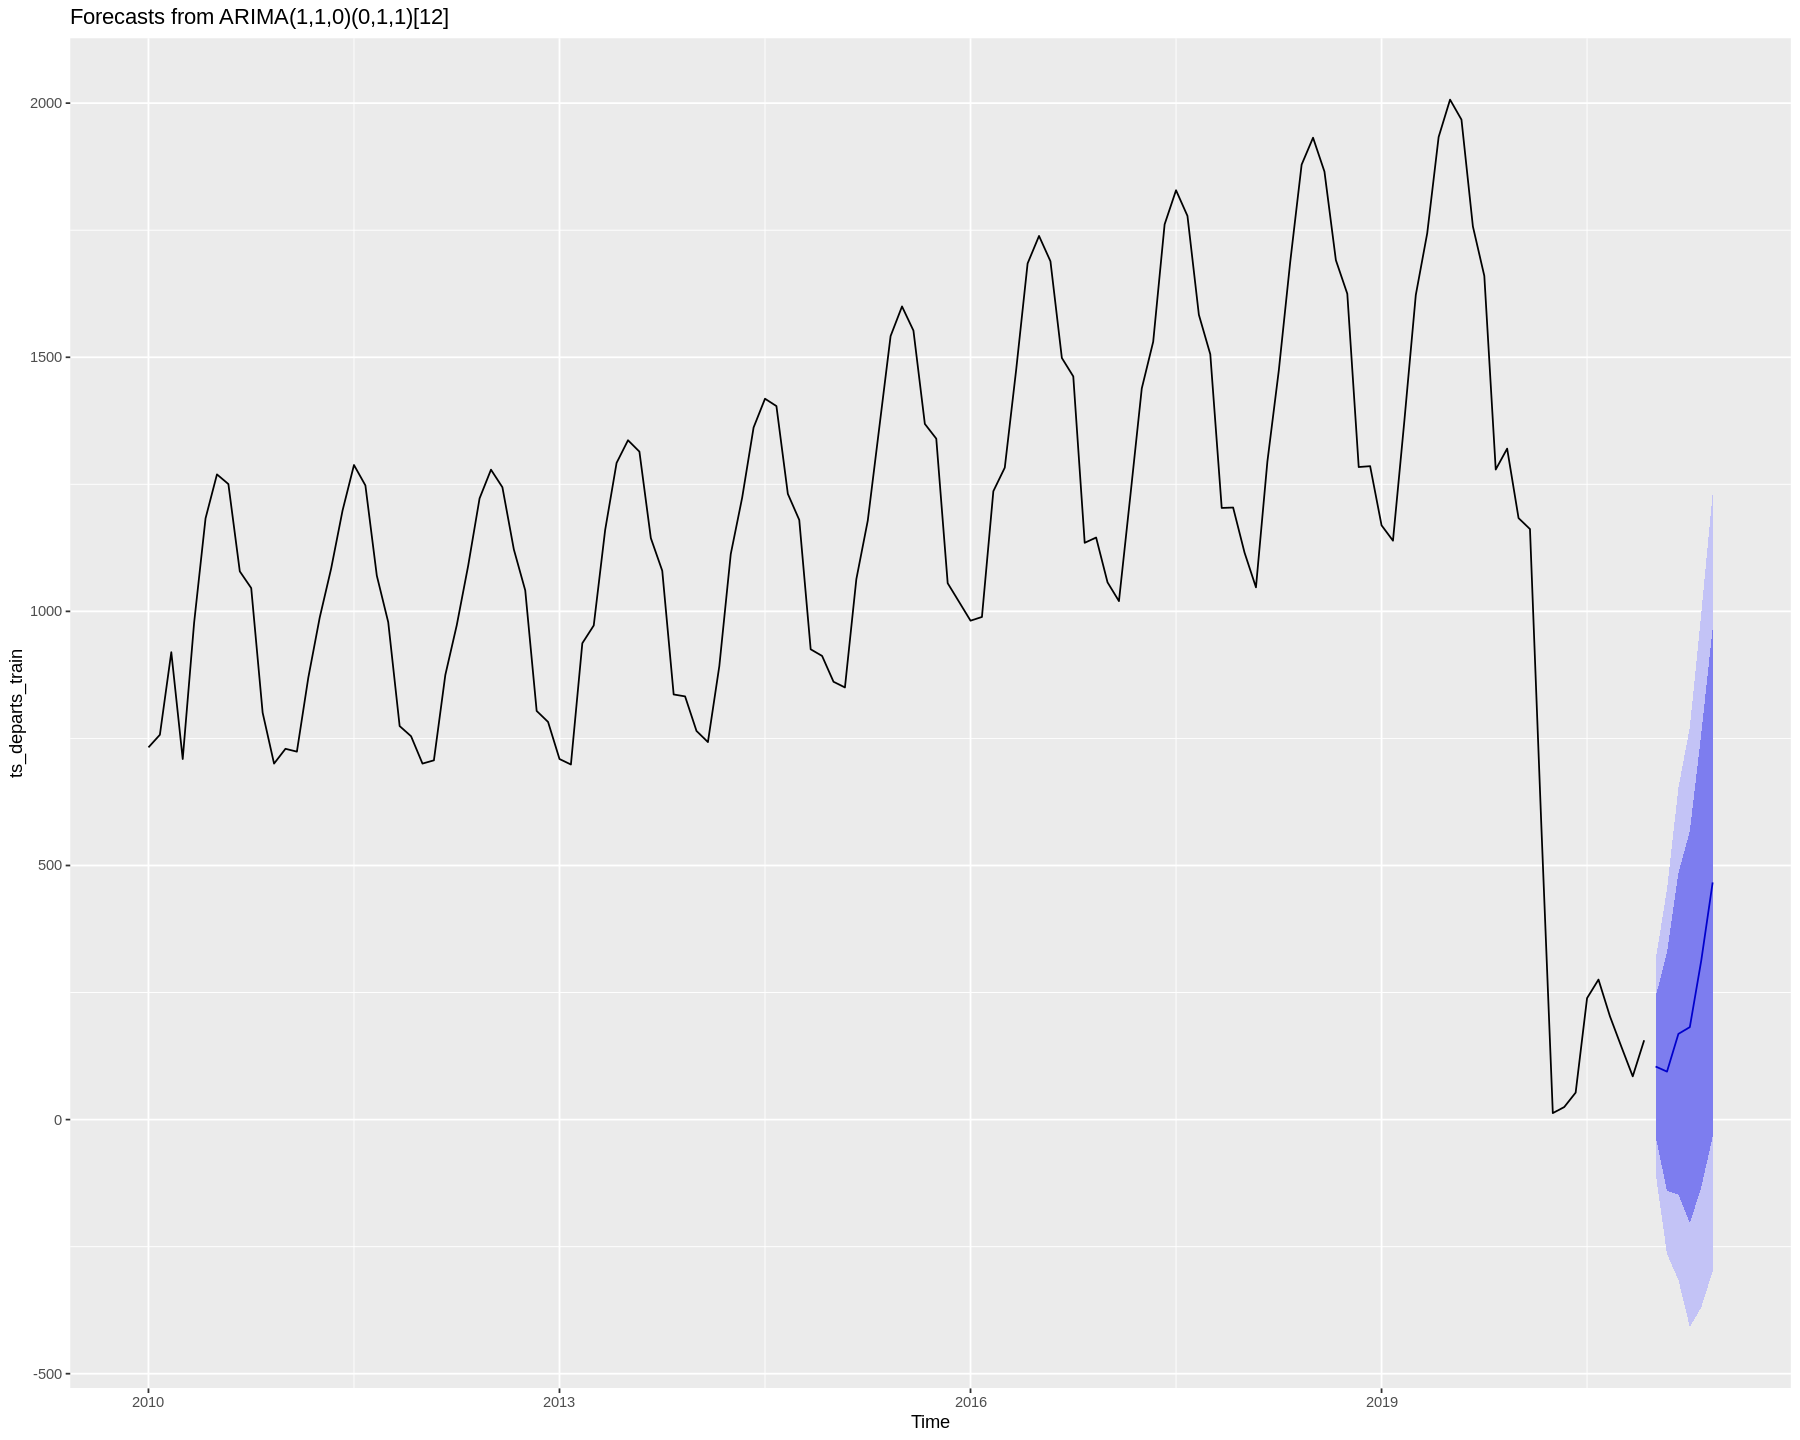

In [170]:
sax %>%forecast(h=6) %>% autoplot()

# Simple Time Series Models

## Simple Forecasting Models
Following Hyndman and Athanasopoulos (2018), chapter 6.2
Fit and forecast on the training data using the Mean, Naive, Seasonal naive, Drift methods

Warning message in ggplot2::geom_line(ggplot2::aes_(x = ~timeVal, y = ~seriesVal, :
“Ignoring unknown parameters: `PI`”


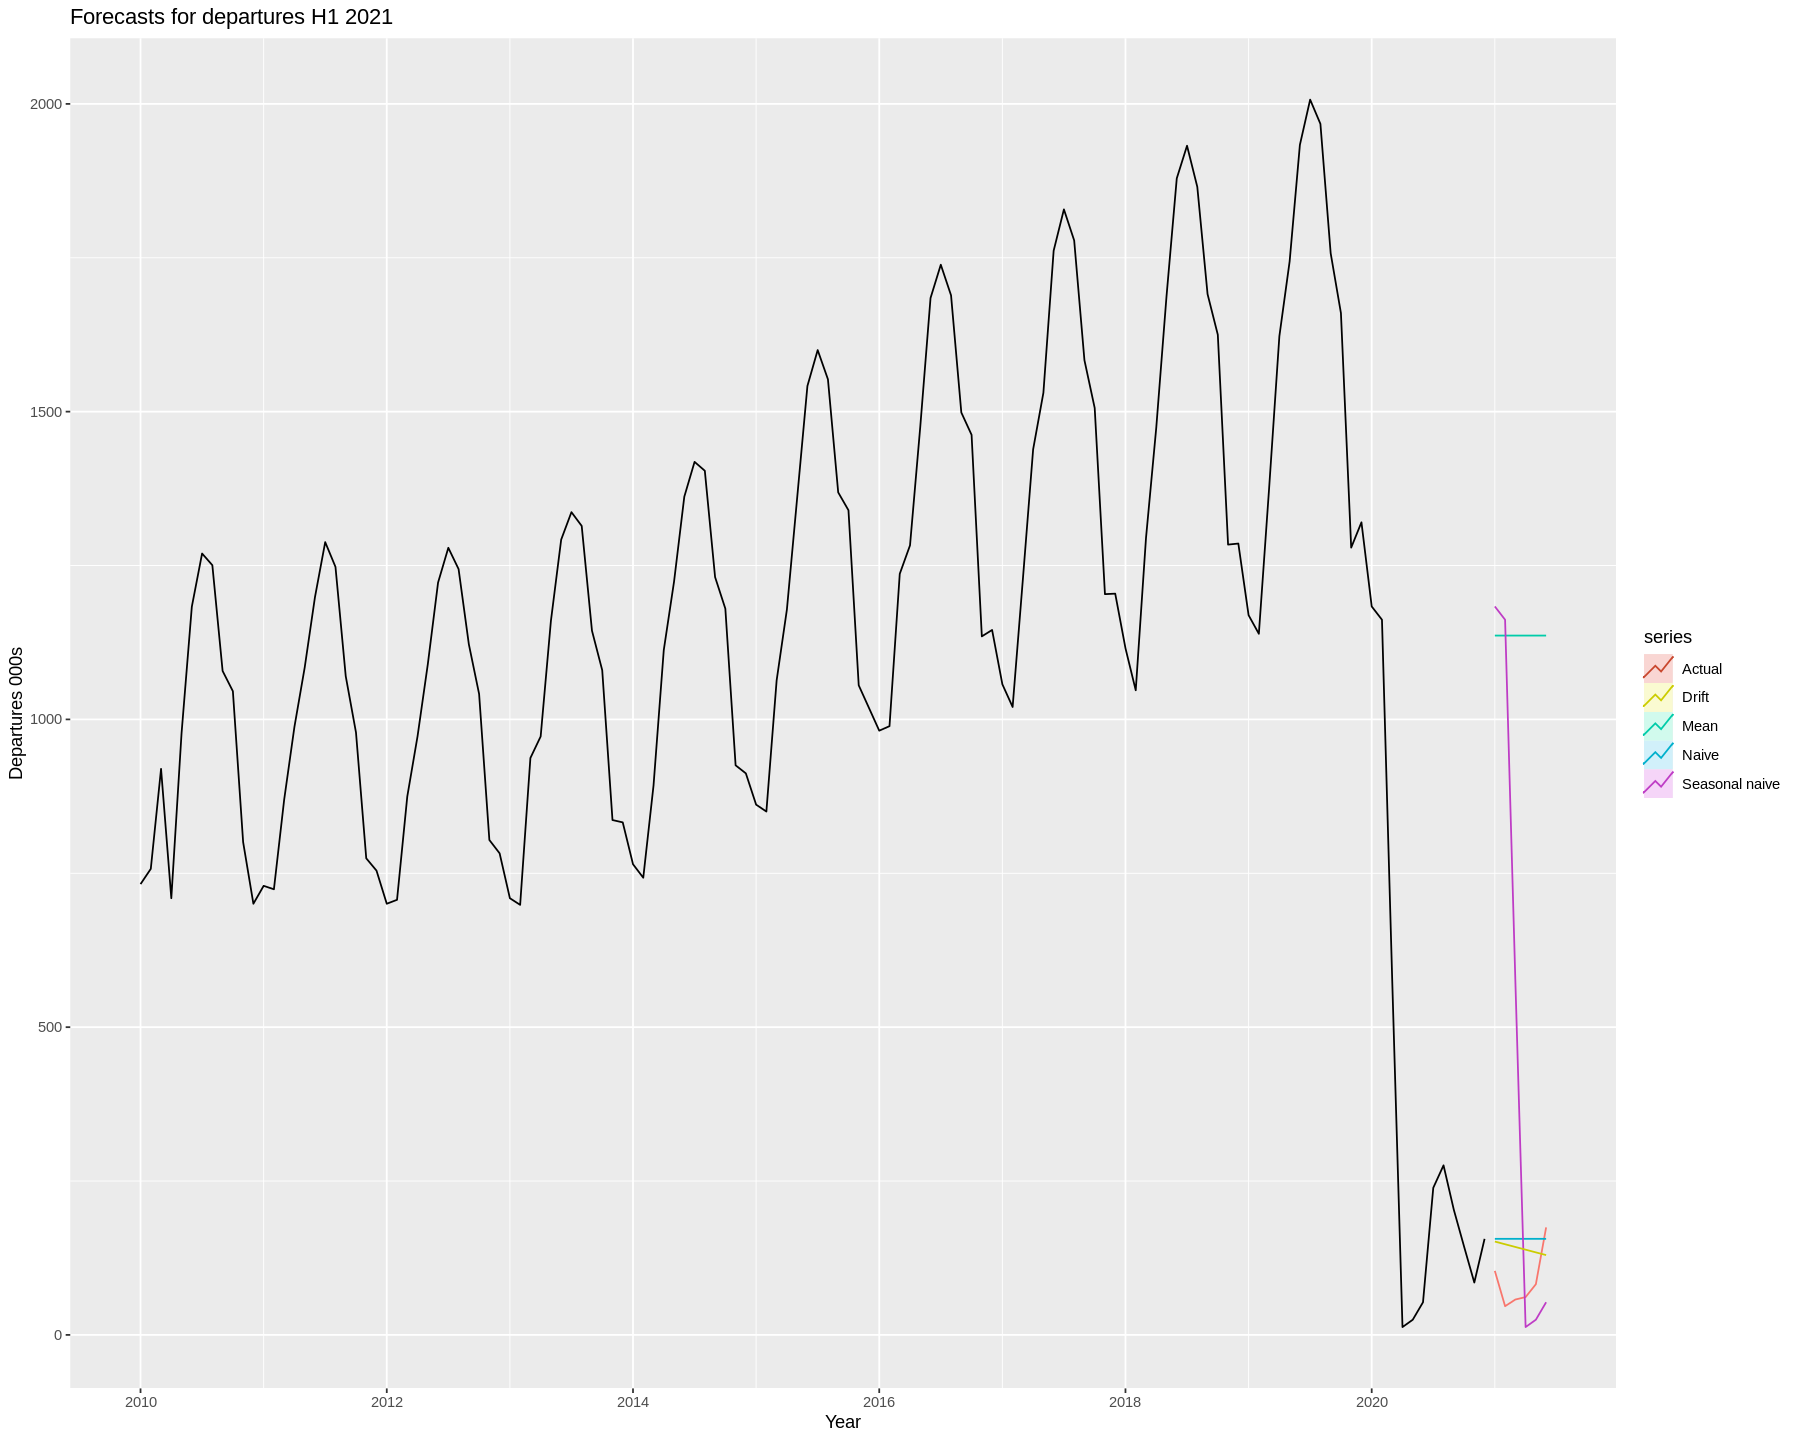

In [173]:
autoplot(ts_departs_train) +
  autolayer(ts_departs_test,series="Actual", PI=FALSE) +
  autolayer(meanf(ts_departs_train,h=6),series="Mean", PI=FALSE) +
  autolayer(naive(ts_departs_train,h=6),series="Naive", PI=FALSE) +
  autolayer(snaive(ts_departs_train,h=6),series="Seasonal naive", PI=FALSE) +
  autolayer(rwf(ts_departs_train,drift=TRUE,h=6),series="Drift",PI=FALSE)+
  ggtitle("Forecasts for departures H1 2021") +
  xlab("Year") + ylab('Departures 000s')

### Mean

In [175]:
ts_departs_test 

,Jan,Feb,Mar,Apr,May,Jun
2021,104.1,46.7,57.5,61.5,82.4,174.7


In [176]:
meanf(ts_departs_train,h=6)

         Point Forecast    Lo 80   Hi 80    Lo 95    Hi 95
Jan 2021       1136.176 586.3412 1686.01 291.7162 1980.635
Feb 2021       1136.176 586.3412 1686.01 291.7162 1980.635
Mar 2021       1136.176 586.3412 1686.01 291.7162 1980.635
Apr 2021       1136.176 586.3412 1686.01 291.7162 1980.635
May 2021       1136.176 586.3412 1686.01 291.7162 1980.635
Jun 2021       1136.176 586.3412 1686.01 291.7162 1980.635

In [179]:
sd(meanf(ts_departs_train,h=6)$mean) # =0, as it's constant

[1] 0

In [180]:
#Forecast errors 
ts_departs_test - (meanf(ts_departs_train,h=6)$mean) 

,Jan,Feb,Mar,Apr,May,Jun
2021,-1032.0758,-1089.4758,-1078.6758,-1074.6758,-1053.7758,-961.4758


In [181]:
#mean of forecast error 
mean(ts_departs_test - (meanf(ts_departs_train,h=6)$mean) ) # -1048.359, very big

[1] -1048.359

In [184]:
accuracy(meanf(ts_departs_train,h=6))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-6.890995e-14,423.6527,322.303,-145.6652,165.8153,1.670837,0.9059284


High forecast errors, so high bias, variance zero 
very bad forecast for H1 2021, will look better as recovery continues in 2021 and 2022
However, it has no seasonality and no trend, which are likely to be important as 
conditions return to normal.  

### Naive

In [186]:
snaive(ts_departs_train,h=6)

         Point Forecast       Lo 80   Hi 80     Lo 95     Hi 95
Jan 2021         1183.5  609.069955 1757.93  304.9851 2062.0149
Feb 2021         1161.9  587.469955 1736.33  283.3851 2040.4149
Mar 2021          575.6    1.169955 1150.03 -302.9149 1454.1149
Apr 2021           12.8 -561.630045  587.23 -865.7149  891.3149
May 2021           24.7 -549.730045  599.13 -853.8149  903.2149
Jun 2021           53.1 -521.330045  627.53 -825.4149  931.6149

In [187]:
#Actual
ts_departs_test 

,Jan,Feb,Mar,Apr,May,Jun
2021,104.1,46.7,57.5,61.5,82.4,174.7


In [188]:
#Forecast errors 
ts_departs_test - (naive(ts_departs_train,h=6)$mean) 

,Jan,Feb,Mar,Apr,May,Jun
2021,-52.0,-109.4,-98.6,-94.6,-73.7,18.6


In [189]:
#mean of forecast error 
mean(ts_departs_test - (naive(ts_departs_train,h=6)$mean) ) # = -68.28333b

[1] -68.28333

In [190]:
# std dev of forecast error
sd(ts_departs_test - (naive(ts_departs_train,h=6)$mean) ) # 47.21324

[1] 47.21324

In [191]:
accuracy(naive(ts_departs_train,h=6))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-4.399237,159.5276,121.7656,-34.04558,46.6151,0.6312399,0.4252624


Forecast errors quite small, but only in H1 2021, so low bias, low variance  
Out of sample performance of depart = 156 estimate will be terrible during recovery in 2021 and 2022  
No seasonality and no trend, which are likely to be important as conditions return to normal.  